In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/train.csv')

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/3117877247.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/train.csv')


In [7]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df.shape

(100000, 28)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## API CALL

*To gather data on unemployment rates, a key factor in determining a customer's credit score, I am utilizing the FRED (Federal Reserve Economic Data) API by making a call with my API key and the relevant endpoints. Since the dataset is centered on the year 2022, I will convert the 'Month' column in the DataFrame (df) into a datetime format. This conversion will enable seamless integration of the unemployment rate data obtained from the API with the existing dataset.*

In [17]:
import pandas as pd
import requests

api_key = 'd6a3cb0adba25aba2b4ab1ae9fd4384d'

urls = {
    'Unemployment_Rate': f'https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&api_key={api_key}&file_type=json'
}

# Function to fetch and process data
def fetch_fred_data(url):
    response = requests.get(url)
    data = response.json()
    observations = data['observations']
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df[['date', 'value']]


unemployment_rate_df = fetch_fred_data(urls['Unemployment_Rate'])

In [19]:
# Display the first few rows of each DataFrame
print("Unemployment Rate Data:")
print(unemployment_rate_df.head())

Unemployment Rate Data:
        date  value
0 1948-01-01    3.4
1 1948-02-01    3.8
2 1948-03-01    4.0
3 1948-04-01    3.9
4 1948-05-01    3.5


In [21]:
unemployment_rate_df.rename(columns={'value': 'Unemployment_Rate'}, inplace=True)
unemployment_rate_df.head(5)

,date,Unemployment_Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [23]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [25]:
# Merging FRED data with your dataset
df = df.merge(unemployment_rate_df, left_on='Month', right_on='date', how='left')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,date,Unemployment_Rate
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,2022-01-01,4.0
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2022-02-01,3.8
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,2022-03-01,3.7
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,2022-04-01,3.7
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,2022-05-01,3.6


In [27]:
columns = [col for col in df.columns if col != 'Credit_Score'] + ['Credit_Score']

# Reindex
df = df[columns]

In [29]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,2022-01-01,4.0,Good
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,2022-02-01,3.8,Good
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,2022-03-01,3.7,Good
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,2022-04-01,3.7,Good
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,2022-05-01,3.6,Good


## Data Preprocessing

* In order to drop unwanted columns, lets understand the columns present in our dataset and if we need those columns.

In [34]:
#Counting unique values in each column
unique_values = df.nunique()
print(unique_values)

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
date                             8
Unemployment_Rate   

Below is a list of columns that can be removed from the dataset, along with the rationale for their removal:


**Customer_ID**: Similar to the ID column, this is a unique identifier for customers and does not play a role in predicting credit scores.

**SSN**: The Social Security Number is a personal identifier and has no relevance to credit score classification. Excluding it also addresses potential privacy concerns.

**ID**: This column serves as a unique identifier for each row and does not contribute meaningful information for classification purposes, as it is purely metadata.

**Monthly_Inhand_Salary**: Since the dataset already includes Annual_Income, this column may be redundant. Alternatively, Monthly_Inhand_Salary can be derived from Annual_Income, so retaining one of the two is sufficient.

**Name**: The customer's name is irrelevant for classification tasks and does not influence credit score predictions. Removing it also helps maintain privacy.

In [42]:
# List of columns to drop
columns_to_drop = ['ID', 'Name', 'SSN', 'Monthly_Inhand_Salary']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,CUS_0xd40,2022-01-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,2022-01-01,4.0,Good
1,CUS_0xd40,2022-02-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,2022-02-01,3.8,Good
2,CUS_0xd40,2022-03-01,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,2022-03-01,3.7,Good
3,CUS_0xd40,2022-04-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,2022-04-01,3.7,Good
4,CUS_0xd40,2022-05-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,2022-05-01,3.6,Good


### 2) Handling Missing values

In [45]:
cols_to_float = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 
                 'Amount_invested_monthly', 'Monthly_Balance']
cols_to_int = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']

# Replace empty strings ('') and unwanted characters ('_') with NaN for proper conversion
df[cols_to_float] = df[cols_to_float].replace({'_': ''}, regex=True)
df[cols_to_float] = df[cols_to_float].replace({'': np.nan}, regex=True)

df[cols_to_int] = df[cols_to_int].replace({'_': ''}, regex=True)
df[cols_to_int] = df[cols_to_int].replace({'': np.nan}, regex=True)

# Now fill NaN values with 0 and convert to float
df[cols_to_float] = df[cols_to_float].fillna(1000000).astype(float)

# Replace NaN with 0 and convert to integer
df[cols_to_int] = df[cols_to_int].fillna(1000000).astype(int)

# Repeat the same steps for integer columns
df[cols_to_int] = df[cols_to_int].replace({'': np.nan, '_': ''}, regex=True)

# Check the data types after conversion
print(df.dtypes)

Customer_ID                         object
Month                       datetime64[ns]
Age                                  int64
Occupation                          object
Annual_Income                      float64
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                        int64
Num_of_Loan                          int64
Type_of_Loan                        object
Delay_from_due_date                  int64
Num_of_Delayed_Payment               int64
Changed_Credit_Limit               float64
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                   float64
Credit_Utilization_Ratio           float64
Credit_History_Age                  object
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly            float64
Payment_Behaviour                   object
Monthly_Balance                    float64
date       

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Customer_ID               100000 non-null  object        
 1   Month                     100000 non-null  datetime64[ns]
 2   Age                       100000 non-null  int64         
 3   Occupation                100000 non-null  object        
 4   Annual_Income             100000 non-null  float64       
 5   Num_Bank_Accounts         100000 non-null  int64         
 6   Num_Credit_Card           100000 non-null  int64         
 7   Interest_Rate             100000 non-null  int64         
 8   Num_of_Loan               100000 non-null  int64         
 9   Type_of_Loan              88592 non-null   object        
 10  Delay_from_due_date       100000 non-null  int64         
 11  Num_of_Delayed_Payment    100000 non-null  int64         
 12  Cha

checking if all the '_', '' and nan values are dealt with.

In [50]:
# List of columns with numeric data types (int and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store the counts of problematic values
invalid_value_counts = {}

# Loop through each numeric column to check for problematic values
for col in numeric_columns:
    # Count occurrences of invalid values
    underscore_count = df[col].astype(str).str.contains('_').sum()
    empty_string_count = (df[col] == '').sum()
    nan_count = df[col].isna().sum()
    
    # Store the counts in the dictionary
    invalid_value_counts[col] = {
        'underscore_count': underscore_count,
        'empty_string_count': empty_string_count,
        'nan_count': nan_count
    }

# Display the counts of invalid values for each numeric column
for col, counts in invalid_value_counts.items():
    print(f"Column: {col}")
    print(f"  Underscores: {counts['underscore_count']}")
    print(f"  Empty strings: {counts['empty_string_count']}")
    print(f"  NaN values: {counts['nan_count']}\n")

Column: Age
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Annual_Income
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Num_Bank_Accounts
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Num_Credit_Card
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Interest_Rate
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Num_of_Loan
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Delay_from_due_date
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Num_of_Delayed_Payment
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Changed_Credit_Limit
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Num_Credit_Inquiries
  Underscores: 0
  Empty strings: 0
  NaN values: 1965

Column: Outstanding_Debt
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Credit_Utilization_Ratio
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Total_EMI_per_month
  Underscores: 0
  Empty strings

**only the column Num_Credit_Inquiries has 1965 Nan values in this, which we will be dealt with.**

In [53]:
# List of numeric columns (both int and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store the counts of 1000000
count_1000000 = {}

# Loop through each numeric column to count occurrences of 1000000
for col in numeric_columns:
    count_1000000[col] = (df[col] == 1000000).sum()

# Display the counts of 1000000 values for each numeric column
print('Occurrences of the value 1000000')
for col, count in count_1000000.items():
    print(f"Column {col} : {count}")

Occurrences of the value 1000000
Column Age : 0
Column Annual_Income : 0
Column Num_Bank_Accounts : 0
Column Num_Credit_Card : 0
Column Interest_Rate : 0
Column Num_of_Loan : 0
Column Delay_from_due_date : 0
Column Num_of_Delayed_Payment : 7002
Column Changed_Credit_Limit : 2091
Column Num_Credit_Inquiries : 0
Column Outstanding_Debt : 0
Column Credit_Utilization_Ratio : 0
Column Total_EMI_per_month : 0
Column Amount_invested_monthly : 4479
Column Monthly_Balance : 1200
Column Unemployment_Rate : 0


**As we can see**

1) **Amount_invested_monthly** : 4479
1) **Monthly_Balance** : 1200
3) **Num_Credit_Inquiries:** 1965
4) **Num_of_Delayed_Payment** : 7002
5) **Changed_Credit_Limit** : 2091
   

In [58]:
# List of non-numeric (object) columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store the counts of problematic values
invalid_value_counts_non_numeric = {}

# Loop through each non-numeric column to check for invalid values
for col in non_numeric_columns:
    # Count occurrences of empty strings and NaN values
    underscore_count = df[col].astype(str).str.contains('_').sum()
    empty_string_count = (df[col] == '').sum()
    nan_count = df[col].isna().sum()
    
    # Store the counts in the dictionary
    invalid_value_counts_non_numeric[col] = {
        'underscore_count': underscore_count,
        'empty_string_count': empty_string_count,
        'nan_count': nan_count
    }

# Display the counts of invalid values for each non-numeric column
for col, counts in invalid_value_counts_non_numeric.items():
    print(f"Column: {col}")
    print(f"  Underscores: {counts['underscore_count']}")
    print(f"  Empty strings: {counts['empty_string_count']}")
    print(f"  NaN values: {counts['nan_count']}\n")

Column: Customer_ID
  Underscores: 100000
  Empty strings: 0
  NaN values: 0

Column: Occupation
  Underscores: 13294
  Empty strings: 0
  NaN values: 0

Column: Type_of_Loan
  Underscores: 0
  Empty strings: 0
  NaN values: 11408

Column: Credit_Mix
  Underscores: 20195
  Empty strings: 0
  NaN values: 0

Column: Credit_History_Age
  Underscores: 0
  Empty strings: 0
  NaN values: 9030

Column: Payment_of_Min_Amount
  Underscores: 0
  Empty strings: 0
  NaN values: 0

Column: Payment_Behaviour
  Underscores: 92400
  Empty strings: 0
  NaN values: 0

Column: Credit_Score
  Underscores: 0
  Empty strings: 0
  NaN values: 0



* Now lets break down what does each aspect mean:

  1) **Customer_ID:** All the Customer_ID have _ in them and it does not matter as we will drop this column at end.
  2) **Occupation:** The value 13294 is the missing values which are basically stored as '----------' in the dataset. We will deal with this as a missing value.
  3) **Type_of_Loan:** The number of missing values in Type_of_Loan is 11408, which we will deal with.
  4) **Credit_Mix:** The missing values in credit mix is stored as '_' in them which as a count of 20195, which we will deal with.
  5) **Credit_History_Age:** The credit history age has 9030 missing values which we will deal with.
  6) **Payment_Behaviour:** This column has 92400 underscore values which are part of the data values, so we can ignore it.

##### 1) Occupation:

In [62]:
# Step 1: Identify rows with '_______' in 'Occupation'
rows_with_underscores = df[df['Occupation'].astype(str) == '_______']
missing_customer_ids = rows_with_underscores['Customer_ID'].unique()
print(f"Count of rows with '_______' in 'Occupation': {len(rows_with_underscores)}")
print(f"Unique Customer_IDs with '_______' in 'Occupation': {len(missing_customer_ids)}\n")

# Step 2: Identify rows without '_______' in 'Occupation'
valid_value_rows = df[df['Occupation'].astype(str) != '_______']
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Occupation': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '_______' in 'Occupation': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Fill missing 'Occupation' values for customers present in both sets
for customer_id in common_customer_ids:
    # Get the valid 'Occupation' for this customer
    valid_occupation = df[(df['Customer_ID'] == customer_id) & (df['Occupation'].astype(str) != '_______')]['Occupation'].values[0]
    
    # Replace the '_______' entries with the valid 'Occupation' for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Occupation'].astype(str) == '_______'), 'Occupation'] = valid_occupation

Count of rows with '_______' in 'Occupation': 7062
Unique Customer_IDs with '_______' in 'Occupation': 5550

Count of rows with valid 'Occupation': 92938
Unique Customer_IDs without '_______' in 'Occupation': 12500

Count of Customer_IDs present in both sets: 5550


In [63]:
# Check if any missing values are left, specifically looking for '_______'
remaining_missing_values = df[df['Occupation'].astype(str) == 'c']
print(f"Count of missing 'Occupation' after filling: {len(remaining_missing_values)}")

# Step to print the length of unique Customer_IDs of remaining rows with '_______'
remaining_unique_customer_ids = remaining_missing_values['Customer_ID'].unique()
print(f"Length of unique Customer_IDs with missing 'Occupation': {len(remaining_unique_customer_ids)}")

Count of missing 'Occupation' after filling: 0
Length of unique Customer_IDs with missing 'Occupation': 0


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/3170509363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')


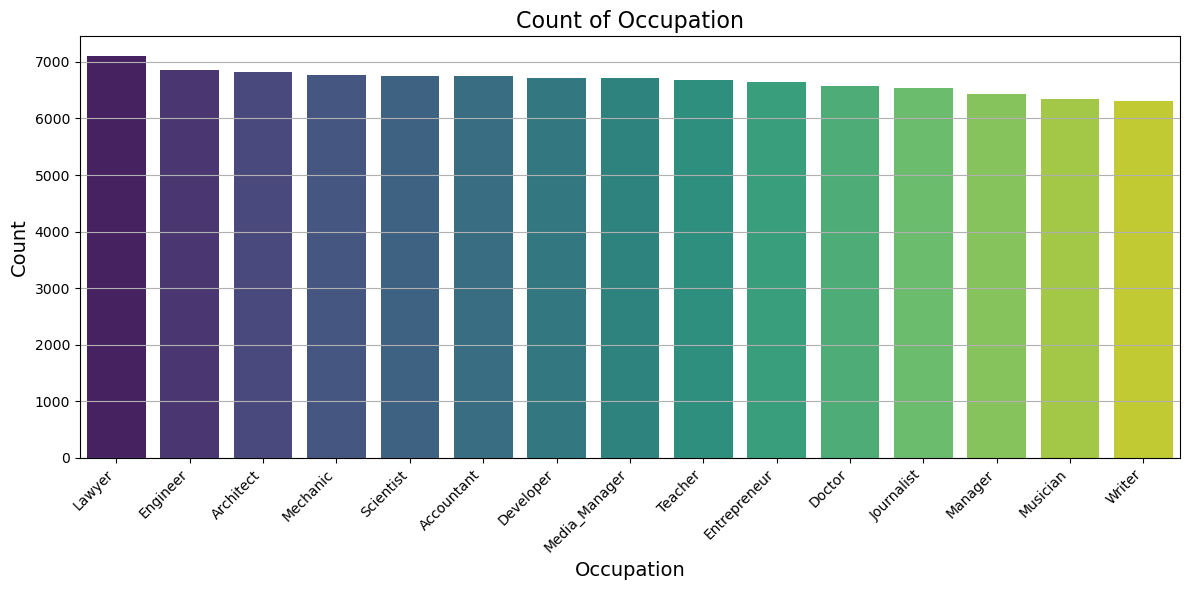

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Occupation' is the column of interest

# Count the occurrences of each occupation
occupation_counts = df['Occupation'].value_counts()

# Create the count plot
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')

# Customize the plot
plt.title('Count of Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

##### 2) Type of Loan

In [69]:
df['Type_of_Loan'].nunique()

6260

In [71]:
# Step 1: Define the mapping of 'and' loan types to their base loan types
loan_type_mapping = {
    'and Auto Loan': 'Auto Loan',
    'and Credit-Builder Loan': 'Credit-Builder Loan',
    'and Personal Loan': 'Personal Loan',
    'and Home Equity Loan': 'Home Equity Loan',
    'and Not Specified': 'Not Specified',
    'and Mortgage Loan': 'Mortgage Loan',
    'and Student Loan': 'Student Loan',
    'and Debt Consolidation Loan': 'Debt Consolidation Loan',
    'and Payday Loan': 'Payday Loan'
}

# Step 2: Create a function to clean the loan types for each row
def clean_loan_types(loan_string):
    if pd.isnull(loan_string):
        return loan_string
    # Split the string by commas and clean each loan type
    loans = loan_string.split(', ')
    cleaned_loans = [loan_type_mapping.get(loan, loan) for loan in loans]  # Replace 'and' types with base types
    cleaned_loans = list(set(cleaned_loans))  # Remove duplicates
    cleaned_loans.sort()  # Sort loan types alphabetically
    return ', '.join(cleaned_loans)

# Step 3: Apply the cleaning function to the 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

# Step 4: Check the updated column to verify the results
df['Type_of_Loan'].nunique()

507

In [73]:
# Step 1: Identify rows with missing 'Type_of_Loan' and print them
rows_with_nan_df = df[df['Type_of_Loan'].isna()]
print(rows_with_nan_df)  # Adjust columns as necessary

      Customer_ID      Month  Age Occupation  Annual_Income  \
32     CUS_0x1cdb 2022-01-01   21  Developer       35547.71   
33     CUS_0x1cdb 2022-02-01   21  Developer       35547.71   
34     CUS_0x1cdb 2022-03-01   21  Developer       35547.71   
35     CUS_0x1cdb 2022-04-01   21  Developer       35547.71   
36     CUS_0x1cdb 2022-05-01   21  Developer       35547.71   
...           ...        ...  ...        ...            ...   
99939  CUS_0xad4f 2022-04-01   47  Developer       22620.79   
99940  CUS_0xad4f 2022-05-01   47  Developer       22620.79   
99941  CUS_0xad4f 2022-06-01   47  Developer       22620.79   
99942  CUS_0xad4f 2022-07-01   48  Developer       22620.79   
99943  CUS_0xad4f 2022-08-01   48  Developer       22620.79   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
32                     7                5              5            0   
33                     7                5              5            0   
34                     7

In [75]:
# Fill missing values in 'Type_of_Loan' with 'No Loan'
df['Type_of_Loan'].fillna('No Loan', inplace=True)

# Optionally, check if the filling was successful
print(df['Type_of_Loan'].isna().sum())  # Should print 0

0


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/772387587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].fillna('No Loan', inplace=True)


##### 3) Credit Mix

In [78]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [80]:
# Step 1: Identify rows with '_' in 'Credit_Mix'
rows_with_underscores = df[df['Credit_Mix'].astype(str) == '_']
missing_customer_ids = rows_with_underscores['Customer_ID'].unique()
print(f"Count of rows with '_' in 'Credit_Mix': {len(rows_with_underscores)}")
print(f"Unique Customer_IDs with '_' in 'Credit_Mix': {len(missing_customer_ids)}\n")

# Step 2: Identify rows without '_' in 'Credit_Mix'
valid_value_rows = df[df['Credit_Mix'].astype(str) != '_']
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Credit_Mix': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '_' in 'Credit_Mix': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Fill missing 'Credit_Mix' values for customers present in both sets
for customer_id in common_customer_ids:
    # Get the valid 'Credit_Mix' for this customer
    valid_credit_mix = df[(df['Customer_ID'] == customer_id) & (df['Credit_Mix'].astype(str) != '_')]['Credit_Mix'].values[0]
    
    # Replace the '_' entries with the valid 'Credit_Mix' for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Credit_Mix'].astype(str) == '_'), 'Credit_Mix'] = valid_credit_mix

Count of rows with '_' in 'Credit_Mix': 20195
Unique Customer_IDs with '_' in 'Credit_Mix': 10477

Count of rows with valid 'Credit_Mix': 79805
Unique Customer_IDs without '_' in 'Credit_Mix': 12500

Count of Customer_IDs present in both sets: 10477


In [81]:
# Check if any missing values are left, specifically looking for '_'
remaining_missing_values = df[df['Credit_Mix'].astype(str) == '_']
print(f"Count of missing 'Credit_Mix' after filling: {len(remaining_missing_values)}")

# Step to print the length of unique Customer_IDs of remaining rows with '_'
remaining_unique_customer_ids = remaining_missing_values['Customer_ID'].unique()
print(f"Length of unique Customer_IDs with missing 'Credit_Mix': {len(remaining_unique_customer_ids)}")

Count of missing 'Credit_Mix' after filling: 0
Length of unique Customer_IDs with missing 'Credit_Mix': 0


In [84]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

##### 4) Credit History Age

In [87]:
import pandas as pd

# Sample DataFrame creation (use your existing DataFrame)
# df = pd.read_csv('your_data_file.csv')  # Load your DataFrame

# Step 1: Define a function to convert Credit_History_Age to months
def convert_credit_history_to_months(age_str):
    if pd.isna(age_str) or age_str == '_':
        return None  # Return None for missing or invalid values
    
    # Split the string into years and months
    parts = age_str.split(' and ')
    years = int(parts[0].split(' ')[0])  # Extract years
    months = int(parts[1].split(' ')[0])  # Extract months
    
    # Calculate total months
    total_months = years * 12 + months
    return total_months

# Step 2: Apply the function to the Credit_History_Age column and create a new column
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_credit_history_to_months)

# Step 3: Replace the original Credit_History_Age column with the new column
df['Credit_History_Age'] = df['Credit_History_Age_Months']

# Step 4: Drop the temporary Credit_History_Age_Months column
df.drop(columns=['Credit_History_Age_Months'], inplace=True)

In [89]:
# Step 1: Define a function to calculate the mean credit history age for each customer and convert to int
def fill_and_convert_credit_history(df):
    # Group by 'Customer_ID' and calculate the mean of 'Credit_History_Age'
    credit_history_means = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.mean()))
    
    # Fill missing values in 'Credit_History_Age' with the calculated mean for each 'Customer_ID'
    df['Credit_History_Age'] = df['Credit_History_Age'].fillna(credit_history_means)
    
    # Convert all values to integers (since months can't be in decimals)
    df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)
    
    return df

# Apply the function to your DataFrame
df = fill_and_convert_credit_history(df)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,CUS_0xd40,2022-01-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,CUS_0xd40,2022-02-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,CUS_0xd40,2022-03-01,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,CUS_0xd40,2022-04-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,CUS_0xd40,2022-05-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [91]:
# Check for NaN values in the 'Credit_History_Age' column
nan_values = df['Credit_History_Age'].isna().sum()

# Display the count of NaN values in the column
print(f"Number of NaN values in 'Credit_History_Age': {nan_values}")

Number of NaN values in 'Credit_History_Age': 0


##### 5) Payment Behaviour

In [94]:
# Count occurrences of the value '!@9#%8' in the 'Payment_Behaviour' column
payment_behaviour_count = df[df['Payment_Behaviour'] == '!@9#%8'].shape[0]

# Display the count
print(f"Count of occurrences of '!@9#%8' in 'Payment_Behaviour': {payment_behaviour_count}")

Count of occurrences of '!@9#%8' in 'Payment_Behaviour': 7600


In [96]:
# Step 1: Identify rows with '!@9#%8' in 'Payment_Behaviour'
rows_with_invalid = df[df['Payment_Behaviour'].astype(str) == '!@9#%8']
missing_customer_ids = rows_with_invalid['Customer_ID'].unique()
print(f"Count of rows with '!@9#%8' in 'Payment_Behaviour': {len(rows_with_invalid)}")
print(f"Unique Customer_IDs with '!@9#%8' in 'Payment_Behaviour': {len(missing_customer_ids)}\n")

# Step 2: Identify rows without '!@9#%8' in 'Payment_Behaviour'
valid_value_rows = df[df['Payment_Behaviour'].astype(str) != '!@9#%8']
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Payment_Behaviour': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '!@9#%8' in 'Payment_Behaviour': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Fill missing 'Payment_Behaviour' values for customers present in both sets
for customer_id in common_customer_ids:
    # Get the valid 'Payment_Behaviour' for this customer (exclude '!@9#%8')
    valid_behaviour = df[(df['Customer_ID'] == customer_id) & (df['Payment_Behaviour'].astype(str) != '!@9#%8')]['Payment_Behaviour'].mode()[0]
    
    # Replace the '!@9#%8' entries with the valid 'Payment_Behaviour' for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Payment_Behaviour'].astype(str) == '!@9#%8'), 'Payment_Behaviour'] = valid_behaviour

Count of rows with '!@9#%8' in 'Payment_Behaviour': 7600
Unique Customer_IDs with '!@9#%8' in 'Payment_Behaviour': 5900

Count of rows with valid 'Payment_Behaviour': 92400
Unique Customer_IDs without '!@9#%8' in 'Payment_Behaviour': 12500

Count of Customer_IDs present in both sets: 5900


In [97]:
# Step 5: Check if any invalid values are left, specifically looking for '!@9#%8'
remaining_invalid_values = df[df['Payment_Behaviour'].astype(str) == '!@9#%8']
print(f"Count of remaining '!@9#%8' values in 'Payment_Behaviour' after filling: {len(remaining_invalid_values)}")

# Step to print the length of unique Customer_IDs of remaining rows with '!@9#%8'
remaining_unique_customer_ids = remaining_invalid_values['Customer_ID'].unique()
print(f"Length of unique Customer_IDs with remaining '!@9#%8' in 'Payment_Behaviour': {len(remaining_unique_customer_ids)}")

Count of remaining '!@9#%8' values in 'Payment_Behaviour' after filling: 0
Length of unique Customer_IDs with remaining '!@9#%8' in 'Payment_Behaviour': 0


##### 6) Payment of Minimum Amount

In [101]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [103]:
# Step 1: Identify rows with 'NM' in 'Payment_of_Min_Amount'
rows_with_nm = df[df['Payment_of_Min_Amount'].astype(str) == 'NM']
nm_customer_ids = rows_with_nm['Customer_ID'].unique()
print(f"Count of rows with 'NM' in 'Payment_of_Min_Amount': {len(rows_with_nm)}")
print(f"Unique Customer_IDs with 'NM' in 'Payment_of_Min_Amount': {len(nm_customer_ids)}\n")

# Step 2: Identify rows without 'NM' in 'Payment_of_Min_Amount'
valid_value_rows = df[df['Payment_of_Min_Amount'].astype(str) != 'NM']
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Payment_of_Min_Amount' (Yes/No): {len(valid_value_rows)}")
print(f"Unique Customer_IDs without 'NM' in 'Payment_of_Min_Amount': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets (customers with 'NM' and also valid values)
common_customer_ids = np.intersect1d(nm_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Replace 'NM' with the mode ('Yes' or 'No') based on other rows of the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Payment_of_Min_Amount' values (Yes/No) for this customer
    valid_payment = df[(df['Customer_ID'] == customer_id) & (df['Payment_of_Min_Amount'].astype(str) != 'NM')]['Payment_of_Min_Amount'].mode()[0]
    
    # Replace the 'NM' entries with the most frequent valid value for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Payment_of_Min_Amount'].astype(str) == 'NM'), 'Payment_of_Min_Amount'] = valid_payment

# Step 5: Check if any 'NM' values remain
remaining_nm_values = df[df['Payment_of_Min_Amount'].astype(str) == 'NM']
print(f"Count of remaining 'NM' values in 'Payment_of_Min_Amount' after filling: {len(remaining_nm_values)}\n")

Count of rows with 'NM' in 'Payment_of_Min_Amount': 12007
Unique Customer_IDs with 'NM' in 'Payment_of_Min_Amount': 8009

Count of rows with valid 'Payment_of_Min_Amount' (Yes/No): 87993
Unique Customer_IDs without 'NM' in 'Payment_of_Min_Amount': 12500

Count of Customer_IDs present in both sets: 8009
Count of remaining 'NM' values in 'Payment_of_Min_Amount' after filling: 0



#### Numeric Datatype

##### 1) Num_of_Delayed_Payment : 7002

In [107]:
# Step 1: Identify rows with '1000000' in 'Num_of_Delayed_Payment'
rows_with_missing = df[df['Num_of_Delayed_Payment'] == 1000000]
missing_customer_ids = rows_with_missing['Customer_ID'].unique()
print(f"Count of rows with '1000000' in 'Num_of_Delayed_Payment': {len(rows_with_missing)}")
print(f"Unique Customer_IDs with '1000000' in 'Num_of_Delayed_Payment': {len(missing_customer_ids)}\n")

# Step 2: Identify rows with valid 'Num_of_Delayed_Payment' values (not '1000000')
valid_value_rows = df[df['Num_of_Delayed_Payment'] != 1000000]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Num_of_Delayed_Payment': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '1000000' in 'Num_of_Delayed_Payment': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}\n")

# Step 4: Replace '1000000' with the mean of valid values for the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Num_of_Delayed_Payment' values for this customer
    valid_payments = df[(df['Customer_ID'] == customer_id) & (df['Num_of_Delayed_Payment'] != 1000000)]['Num_of_Delayed_Payment']
    
    # Calculate the mean of valid values
    mean_valid_payment = valid_payments.mean()
    
    # Replace '1000000' entries with the mean of valid values for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Num_of_Delayed_Payment'] == 1000000), 'Num_of_Delayed_Payment'] = mean_valid_payment

# Step 5: Check if any '1000000' values remain
remaining_missing_values = df[df['Num_of_Delayed_Payment'] == 1000000]
print(f"Count of remaining '1000000' values in 'Num_of_Delayed_Payment' after filling: {len(remaining_missing_values)}")

Count of rows with '1000000' in 'Num_of_Delayed_Payment': 7002
Unique Customer_IDs with '1000000' in 'Num_of_Delayed_Payment': 5465

Count of rows with valid 'Num_of_Delayed_Payment': 92998
Unique Customer_IDs without '1000000' in 'Num_of_Delayed_Payment': 12500

Count of Customer_IDs present in both sets: 5465



/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/3896511136.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Customer_ID'] == customer_id) & (df['Num_of_Delayed_Payment'] == 1000000), 'Num_of_Delayed_Payment'] = mean_valid_payment


Count of remaining '1000000' values in 'Num_of_Delayed_Payment' after filling: 0


##### 3) Amount_invested_monthly : 4479

In [111]:
# Step 1: Identify rows with '1000000' in 'Amount_invested_monthly'
rows_with_missing = df[df['Amount_invested_monthly'] == 1000000]
missing_customer_ids = rows_with_missing['Customer_ID'].unique()
print(f"Count of rows with '1000000' in 'Amount_invested_monthly': {len(rows_with_missing)}")
print(f"Unique Customer_IDs with '1000000' in 'Amount_invested_monthly': {len(missing_customer_ids)}\n")

# Step 2: Identify rows with valid 'Amount_invested_monthly' values (not '1000000')
valid_value_rows = df[df['Amount_invested_monthly'] != 1000000]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Amount_invested_monthly': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '1000000' in 'Amount_invested_monthly': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Replace '1000000' with the mean of valid values for the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Amount_invested_monthly' values for this customer
    valid_investments = df[(df['Customer_ID'] == customer_id) & (df['Amount_invested_monthly'] != 1000000)]['Amount_invested_monthly']
    
    # Calculate the mean of valid values
    mean_valid_investment = valid_investments.mean()
    
    # Replace '1000000' entries with the mean of valid values for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Amount_invested_monthly'] == 1000000), 'Amount_invested_monthly'] = mean_valid_investment

# Step 5: Check if any '1000000' values remain
remaining_missing_values = df[df['Amount_invested_monthly'] == 1000000]
print(f"Count of remaining '1000000' values in 'Amount_invested_monthly' after filling: {len(remaining_missing_values)}")

Count of rows with '1000000' in 'Amount_invested_monthly': 4479
Unique Customer_IDs with '1000000' in 'Amount_invested_monthly': 3826

Count of rows with valid 'Amount_invested_monthly': 95521
Unique Customer_IDs without '1000000' in 'Amount_invested_monthly': 12500

Count of Customer_IDs present in both sets: 3826
Count of remaining '1000000' values in 'Amount_invested_monthly' after filling: 0


##### 2) Changed_Credit_Limit : 2091

In [114]:
# Step 1: Identify rows with '1000000' in 'Changed_Credit_Limit'
rows_with_missing = df[df['Changed_Credit_Limit'] == 1000000]
missing_customer_ids = rows_with_missing['Customer_ID'].unique()
print(f"Count of rows with '1000000' in 'Changed_Credit_Limit': {len(rows_with_missing)}")
print(f"Unique Customer_IDs with '1000000' in 'Changed_Credit_Limit': {len(missing_customer_ids)}\n")

# Step 2: Identify rows with valid 'Changed_Credit_Limit' values (not '1000000')
valid_value_rows = df[df['Changed_Credit_Limit'] != 1000000]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Changed_Credit_Limit': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '1000000' in 'Changed_Credit_Limit': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Replace '1000000' with the mean of valid values for the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Changed_Credit_Limit' values for this customer
    valid_limits = df[(df['Customer_ID'] == customer_id) & (df['Changed_Credit_Limit'] != 1000000)]['Changed_Credit_Limit']
    
    # Calculate the mean of valid values
    mean_valid_limit = valid_limits.mean()
    
    # Replace '1000000' entries with the mean of valid values for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Changed_Credit_Limit'] == 1000000), 'Changed_Credit_Limit'] = mean_valid_limit

# Step 5: Check if any '1000000' values remain
remaining_missing_values = df[df['Changed_Credit_Limit'] == 1000000]
print(f"Count of remaining '1000000' values in 'Changed_Credit_Limit' after filling: {len(remaining_missing_values)}")

Count of rows with '1000000' in 'Changed_Credit_Limit': 2091
Unique Customer_IDs with '1000000' in 'Changed_Credit_Limit': 1960

Count of rows with valid 'Changed_Credit_Limit': 97909
Unique Customer_IDs without '1000000' in 'Changed_Credit_Limit': 12500

Count of Customer_IDs present in both sets: 1960
Count of remaining '1000000' values in 'Changed_Credit_Limit' after filling: 0


##### 4) Monthly_Balance : 1200

In [117]:
# Step 1: Identify rows with '1000000' in 'Monthly_Balance'
rows_with_missing = df[df['Monthly_Balance'] == 1000000]
missing_customer_ids = rows_with_missing['Customer_ID'].unique()
print(f"Count of rows with '1000000' in 'Monthly_Balance': {len(rows_with_missing)}")
print(f"Unique Customer_IDs with '1000000' in 'Monthly_Balance': {len(missing_customer_ids)}\n")

# Step 2: Identify rows with valid 'Monthly_Balance' values (not '1000000')
valid_value_rows = df[df['Monthly_Balance'] != 1000000]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Monthly_Balance': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without '1000000' in 'Monthly_Balance': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Replace '1000000' with the mean of valid values for the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Monthly_Balance' values for this customer
    valid_balances = df[(df['Customer_ID'] == customer_id) & (df['Monthly_Balance'] != 1000000)]['Monthly_Balance']
    
    # Calculate the mean of valid values
    mean_valid_balance = valid_balances.mean()
    
    # Replace '1000000' entries with the mean of valid values for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Monthly_Balance'] == 1000000), 'Monthly_Balance'] = mean_valid_balance

# Step 5: Check if any '1000000' values remain
remaining_missing_values = df[df['Monthly_Balance'] == 1000000]
print(f"Count of remaining '1000000' values in 'Monthly_Balance' after filling: {len(remaining_missing_values)}")

Count of rows with '1000000' in 'Monthly_Balance': 1200
Unique Customer_IDs with '1000000' in 'Monthly_Balance': 959

Count of rows with valid 'Monthly_Balance': 98800
Unique Customer_IDs without '1000000' in 'Monthly_Balance': 12500

Count of Customer_IDs present in both sets: 959
Count of remaining '1000000' values in 'Monthly_Balance' after filling: 0


##### 5) Num_Credit_Inquiries: 1965

In [120]:
# Step 1: Identify rows with NaN in 'Num_Credit_Inquiries'
rows_with_missing = df[df['Num_Credit_Inquiries'].isna()]
missing_customer_ids = rows_with_missing['Customer_ID'].unique()
print(f"Count of rows with NaN in 'Num_Credit_Inquiries': {len(rows_with_missing)}")
print(f"Unique Customer_IDs with NaN in 'Num_Credit_Inquiries': {len(missing_customer_ids)}\n")

# Step 2: Identify rows with valid 'Num_Credit_Inquiries' values (not NaN)
valid_value_rows = df[~df['Num_Credit_Inquiries'].isna()]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()
print(f"Count of rows with valid 'Num_Credit_Inquiries': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without NaN in 'Num_Credit_Inquiries': {len(valid_customer_ids)}\n")

# Step 3: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(missing_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 4: Replace NaN with the mean of valid values for the same customer
for customer_id in common_customer_ids:
    # Get the valid 'Num_Credit_Inquiries' values for this customer
    valid_inquiries = df[(df['Customer_ID'] == customer_id) & (~df['Num_Credit_Inquiries'].isna())]['Num_Credit_Inquiries']
    
    # Calculate the mean of valid values
    mean_valid_inquiries = valid_inquiries.mean()
    
    # Replace NaN entries with the mean of valid values for this customer
    df.loc[(df['Customer_ID'] == customer_id) & (df['Num_Credit_Inquiries'].isna()), 'Num_Credit_Inquiries'] = mean_valid_inquiries

# Step 5: Check if any NaN values remain
remaining_missing_values = df[df['Num_Credit_Inquiries'].isna()]
print(f"Count of remaining NaN values in 'Num_Credit_Inquiries' after filling: {len(remaining_missing_values)}")

Count of rows with NaN in 'Num_Credit_Inquiries': 1965
Unique Customer_IDs with NaN in 'Num_Credit_Inquiries': 1827

Count of rows with valid 'Num_Credit_Inquiries': 98035
Unique Customer_IDs without NaN in 'Num_Credit_Inquiries': 12500

Count of Customer_IDs present in both sets: 1827
Count of remaining NaN values in 'Num_Credit_Inquiries' after filling: 0


### 3) Outliers

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/1240287639.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette='viridis')
/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/1240287639.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/1240287639.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette='viridis')
/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/12

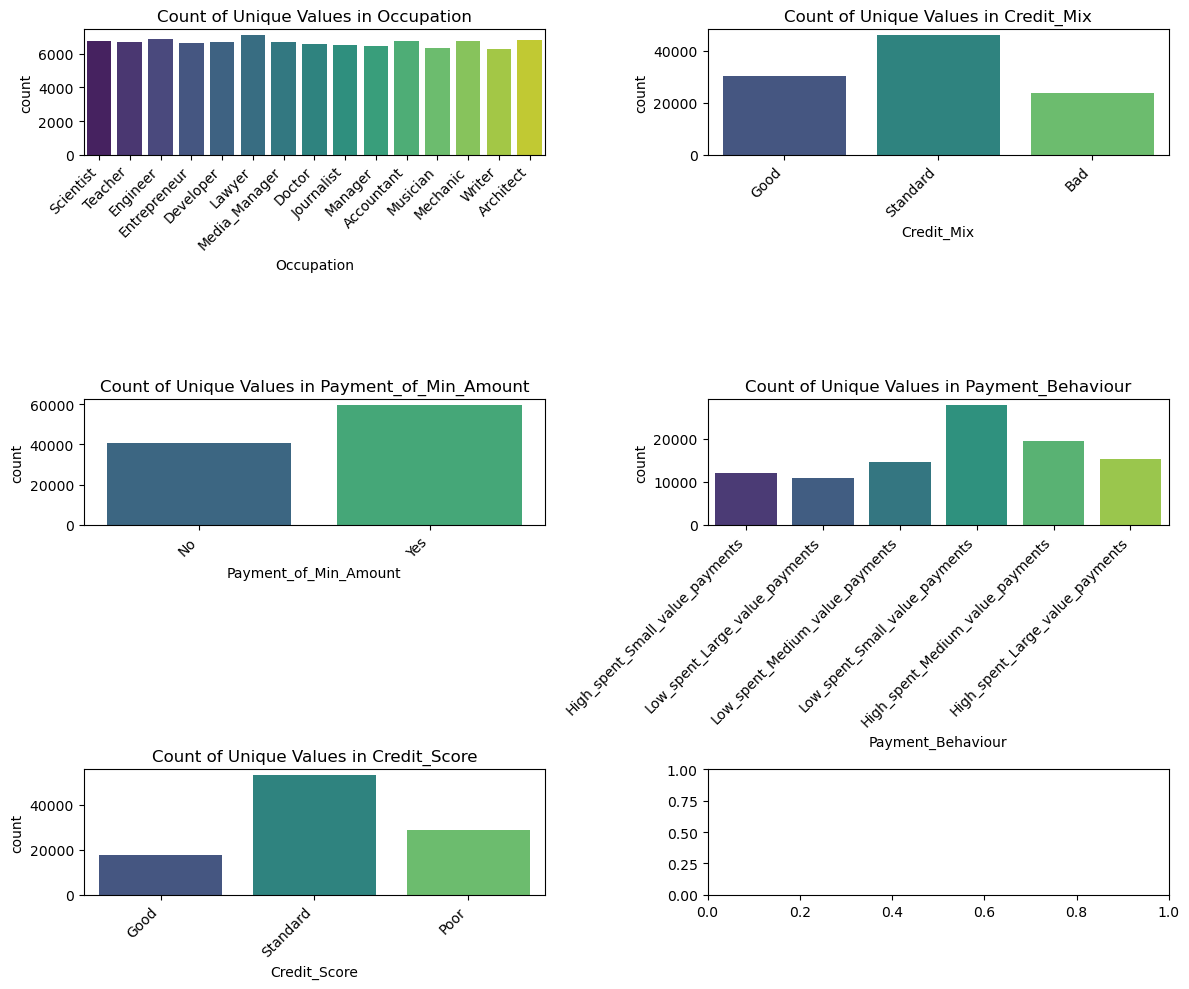

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and layout for subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the columns to plot
columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Create a count plot for each specified column
for ax, column in zip(axes, columns):
    sns.countplot(data=df, x=column, ax=ax, palette='viridis')
    ax.set_title(f'Count of Unique Values in {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

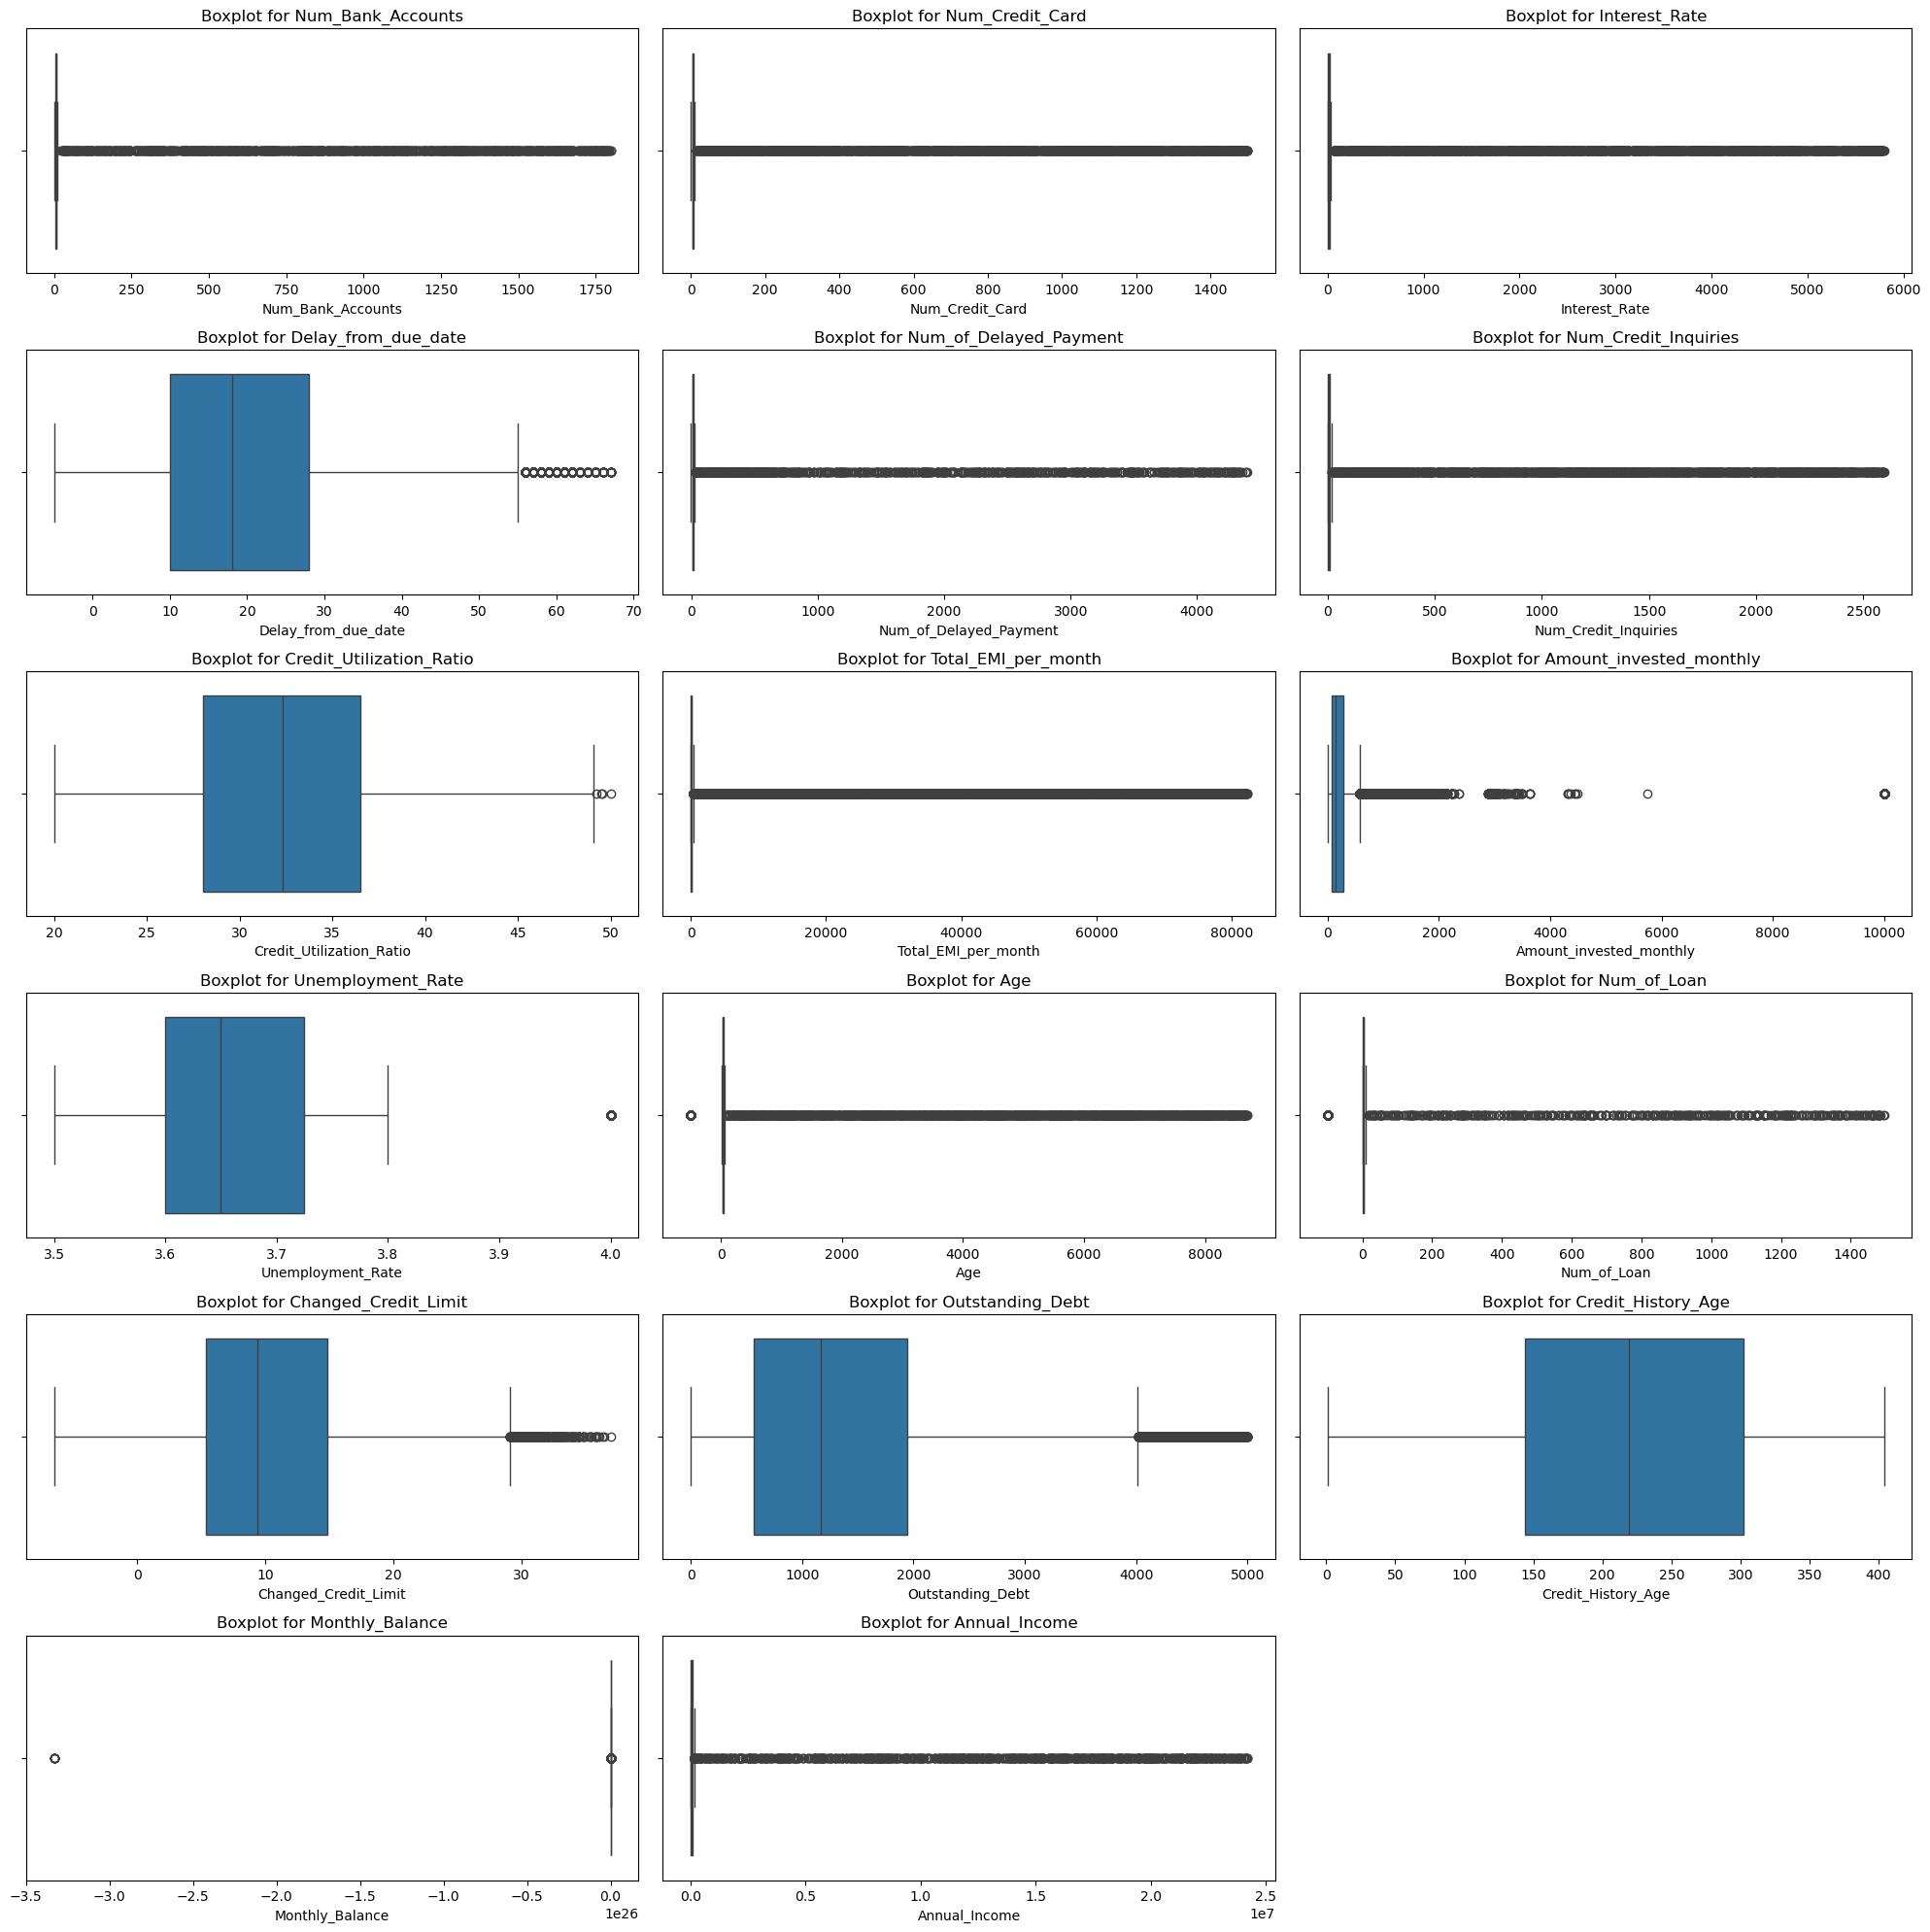

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot, including the specified columns
columns_to_plot = [
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Num_of_Delayed_Payment', 
    'Num_Credit_Inquiries', 
    'Credit_Utilization_Ratio', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly', 
    'Unemployment_Rate',
    'Age',
    'Num_of_Loan',           
    'Changed_Credit_Limit',    
    'Outstanding_Debt',         
    'Credit_History_Age',
    'Monthly_Balance', 
    'Annual_Income'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))  # Adjust size as needed

# Loop through each column and plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(6, 3, i + 1)  # 5 rows, 3 columns, i + 1 for the subplot index
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [127]:
# List to hold the results
negative_counts = {}

# Iterate through numeric columns and count negative values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    negative_count = (df[column] < 0).sum()
    negative_counts[column] = negative_count

# Print the counts of negative values alongside column names
for column, count in negative_counts.items():
    print(f"Count of negative values in '{column}': {count}")

Count of negative values in 'Age': 886
Count of negative values in 'Annual_Income': 0
Count of negative values in 'Num_Bank_Accounts': 21
Count of negative values in 'Num_Credit_Card': 0
Count of negative values in 'Interest_Rate': 0
Count of negative values in 'Num_of_Loan': 3876
Count of negative values in 'Delay_from_due_date': 591
Count of negative values in 'Num_of_Delayed_Payment': 707
Count of negative values in 'Changed_Credit_Limit': 1599
Count of negative values in 'Num_Credit_Inquiries': 0
Count of negative values in 'Outstanding_Debt': 0
Count of negative values in 'Credit_Utilization_Ratio': 0
Count of negative values in 'Credit_History_Age': 0
Count of negative values in 'Total_EMI_per_month': 0
Count of negative values in 'Amount_invested_monthly': 0
Count of negative values in 'Monthly_Balance': 9
Count of negative values in 'Unemployment_Rate': 0


Lower bound for outliers: -3.0
Upper bound for outliers: 13.0

Count of rows with negative or outlier values in 'Num_Bank_Accounts': 1336
Unique Customer_IDs with negative or outlier values in 'Num_Bank_Accounts': 1258

Count of rows with valid 'Num_Bank_Accounts': 98664
Unique Customer_IDs without negative or outlier values in 'Num_Bank_Accounts': 12500

Count of Customer_IDs present in both sets: 1258


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/2577859419.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.428571428571429' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper_bound)), 'Num_Bank_Accounts'] = mean_value


Count of remaining negative or outlier values in 'Num_Bank_Accounts' after filling: 0



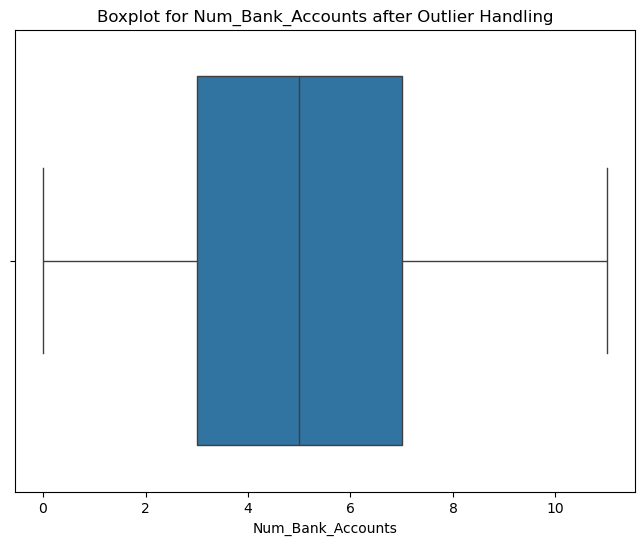

In [129]:
# 1) Num_Bank_Accounts

# Step 1: Calculate the IQR and whiskers for 'Num_Bank_Accounts' to identify outliers
Q1 = df['Num_Bank_Accounts'].quantile(0.25)
Q3 = df['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Num_Bank_Accounts'] < lower_bound) | (df['Num_Bank_Accounts'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Num_Bank_Accounts': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Num_Bank_Accounts': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Num_Bank_Accounts': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Num_Bank_Accounts': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Num_Bank_Accounts' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Num_Bank_Accounts' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= upper_bound)]['Num_Bank_Accounts']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper_bound)), 'Num_Bank_Accounts'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Num_Bank_Accounts'
remaining_outlier_values = df[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Num_Bank_Accounts' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Num_Bank_Accounts' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Bank_Accounts'])
plt.title('Boxplot for Num_Bank_Accounts after Outlier Handling')
plt.xlabel('Num_Bank_Accounts')
plt.show()

Upper bound for outliers in 'Num_Credit_Card': 11.5

Count of rows with invalid values in 'Num_Credit_Card': 2271
Unique Customer_IDs with invalid values in 'Num_Credit_Card': 2116

Count of rows with valid 'Num_Credit_Card': 97729
Unique Customer_IDs without invalid values in 'Num_Credit_Card': 12500

Count of Customer_IDs present in both sets: 2116


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/3852133081.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.857142857142857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > upper_bound)), 'Num_Credit_Card'] = mean_value


Count of remaining invalid values in 'Num_Credit_Card' after filling: 0



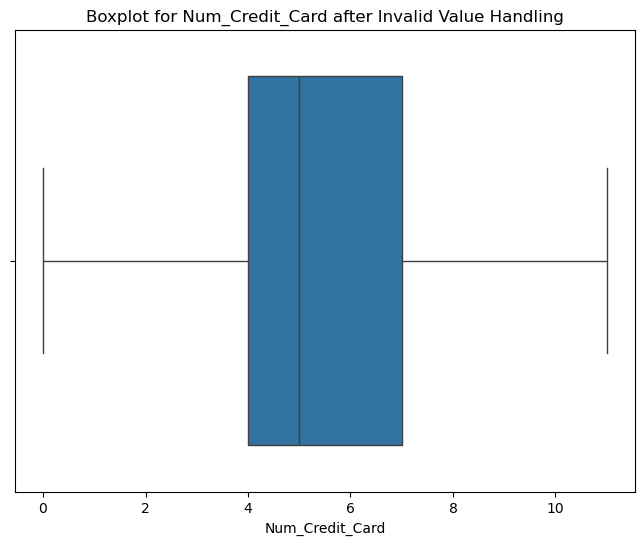

In [131]:
# 2) Num_Credit_Card


# Step 1: Calculate the IQR and whiskers for 'Num_Credit_Card' to identify outliers
Q1 = df['Num_Credit_Card'].quantile(0.25)
Q3 = df['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper bound for outliers based on 1.5*IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers in 'Num_Credit_Card': {upper_bound}\n")

# Step 2: Identify rows with negative values or above upper bound in 'Num_Credit_Card'
invalid_rows = df[(df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > upper_bound)]
invalid_customer_ids = invalid_rows['Customer_ID'].unique()

print(f"Count of rows with invalid values in 'Num_Credit_Card': {len(invalid_rows)}")
print(f"Unique Customer_IDs with invalid values in 'Num_Credit_Card': {len(invalid_customer_ids)}\n")

# Step 3: Identify rows without invalid values
valid_value_rows = df[(df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Num_Credit_Card': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without invalid values in 'Num_Credit_Card': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(invalid_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace invalid values in 'Num_Credit_Card' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Num_Credit_Card' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= upper_bound)]['Num_Credit_Card']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the invalid entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > upper_bound)), 'Num_Credit_Card'] = mean_value

# Step 6: Check if any invalid values remain in 'Num_Credit_Card'
remaining_invalid_values = df[(df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > upper_bound)]
print(f"Count of remaining invalid values in 'Num_Credit_Card' after filling: {len(remaining_invalid_values)}\n")

# Optional: Boxplot visualization for 'Num_Credit_Card' after handling invalid values
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Credit_Card'])
plt.title('Boxplot for Num_Credit_Card after Invalid Value Handling')
plt.xlabel('Num_Credit_Card')
plt.show()

Lower bound for outliers in 'Num_of_Delayed_Payment': -4.5
Upper bound for outliers in 'Num_of_Delayed_Payment': 31.5

Count of rows with negative or outlier values in 'Num_of_Delayed_Payment': 1776
Unique Customer_IDs with negative or outlier values in 'Num_of_Delayed_Payment': 1126

Count of rows with valid 'Num_of_Delayed_Payment': 98224
Unique Customer_IDs without negative or outlier values in 'Num_of_Delayed_Payment': 12500

Count of Customer_IDs present in both sets: 1126
Count of remaining negative or outlier values in 'Num_of_Delayed_Payment' after filling: 0



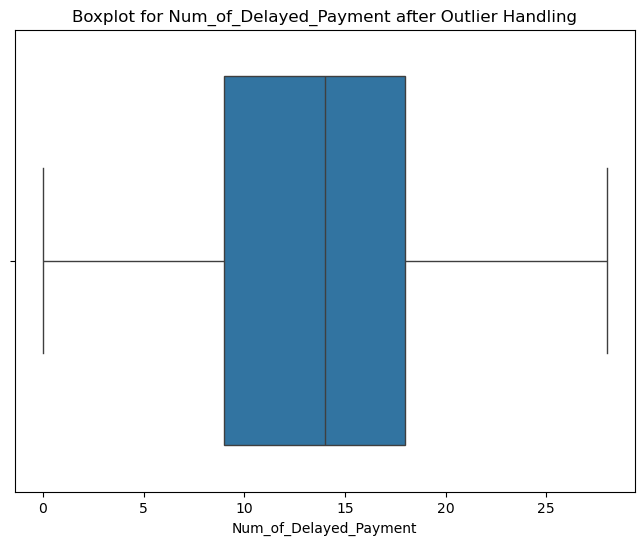

In [133]:
# 3) Num_of_Delayed_Payments

# Step 1: Calculate the IQR and whiskers for 'Num_of_Delayed_Payment' to identify outliers
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Num_of_Delayed_Payment': {lower_bound}")
print(f"Upper bound for outliers in 'Num_of_Delayed_Payment': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Num_of_Delayed_Payment'] < lower_bound) | (df['Num_of_Delayed_Payment'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Num_of_Delayed_Payment': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Num_of_Delayed_Payment': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Num_of_Delayed_Payment'] >= 0) & (df['Num_of_Delayed_Payment'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Num_of_Delayed_Payment': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Num_of_Delayed_Payment': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Num_of_Delayed_Payment' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Num_of_Delayed_Payment' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Num_of_Delayed_Payment'] >= 0) & (df['Num_of_Delayed_Payment'] <= upper_bound)]['Num_of_Delayed_Payment']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > upper_bound)), 'Num_of_Delayed_Payment'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Num_of_Delayed_Payment'
remaining_outlier_values = df[(df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Num_of_Delayed_Payment' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Num_of_Delayed_Payment' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_of_Delayed_Payment'])
plt.title('Boxplot for Num_of_Delayed_Payment after Outlier Handling')
plt.xlabel('Num_of_Delayed_Payment')
plt.show()

Lower bound for outliers in 'Interest_Rate': -10.0
Upper bound for outliers in 'Interest_Rate': 38.0

Count of rows with negative or outlier values in 'Interest_Rate': 2034
Unique Customer_IDs with negative or outlier values in 'Interest_Rate': 1911

Count of rows with valid 'Interest_Rate': 97966
Unique Customer_IDs without negative or outlier values in 'Interest_Rate': 12500

Count of Customer_IDs present in both sets: 1911
Count of remaining negative or outlier values in 'Interest_Rate' after filling: 0



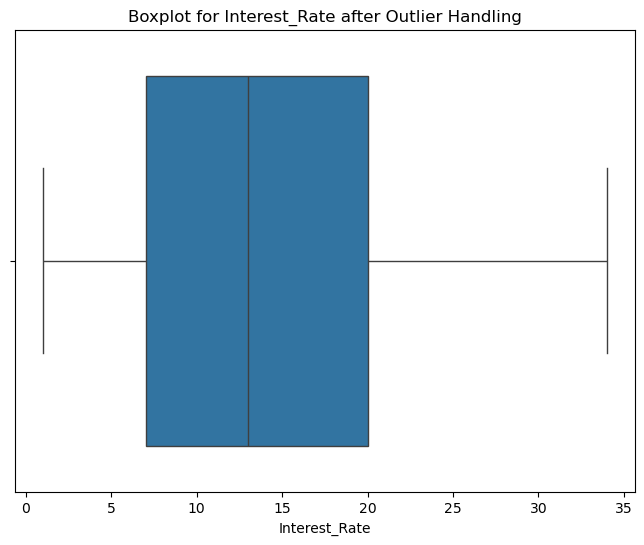

In [135]:
# 4) Interest_Rate

# Step 1: Calculate the IQR and whiskers for 'Interest_Rate' to identify outliers
Q1 = df['Interest_Rate'].quantile(0.25)
Q3 = df['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Interest_Rate': {lower_bound}")
print(f"Upper bound for outliers in 'Interest_Rate': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Interest_Rate'] < lower_bound) | (df['Interest_Rate'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Interest_Rate'] < 0) | (df['Interest_Rate'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Interest_Rate': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Interest_Rate': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Interest_Rate'] >= 0) & (df['Interest_Rate'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Interest_Rate': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Interest_Rate': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Interest_Rate' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Interest_Rate' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Interest_Rate'] >= 0) & (df['Interest_Rate'] <= upper_bound)]['Interest_Rate']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Interest_Rate'] < 0) | (df['Interest_Rate'] > upper_bound)), 'Interest_Rate'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Interest_Rate'
remaining_outlier_values = df[(df['Interest_Rate'] < 0) | (df['Interest_Rate'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Interest_Rate' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Interest_Rate' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Interest_Rate'])
plt.title('Boxplot for Interest_Rate after Outlier Handling')
plt.xlabel('Interest_Rate')
plt.show()

Lower bound for outliers in 'Num_Credit_Inquiries': -6.0
Upper bound for outliers in 'Num_Credit_Inquiries': 18.0

Count of rows with negative or outlier values in 'Num_Credit_Inquiries': 1839
Unique Customer_IDs with negative or outlier values in 'Num_Credit_Inquiries': 1559

Count of rows with valid 'Num_Credit_Inquiries': 98161
Unique Customer_IDs without negative or outlier values in 'Num_Credit_Inquiries': 12500

Count of Customer_IDs present in both sets: 1559
Count of remaining negative or outlier values in 'Num_Credit_Inquiries' after filling: 0



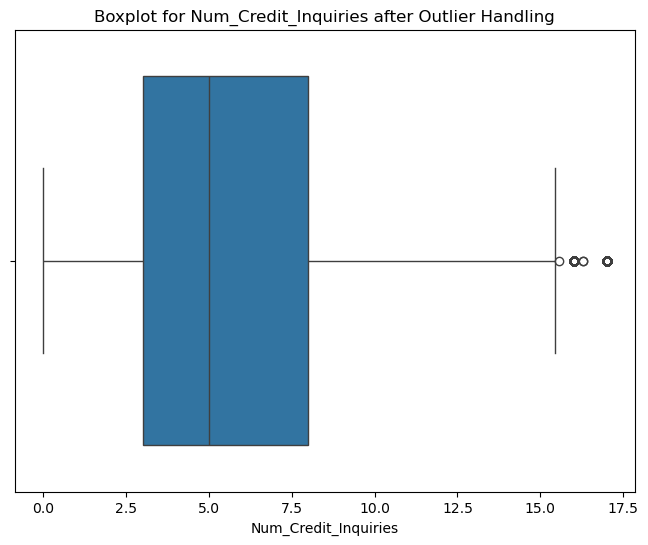

In [137]:
# 5) Num_Credit_Inquiries

# Step 1: Calculate the IQR and whiskers for 'Num_Credit_Inquiries' to identify outliers
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Num_Credit_Inquiries': {lower_bound}")
print(f"Upper bound for outliers in 'Num_Credit_Inquiries': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Num_Credit_Inquiries': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Num_Credit_Inquiries': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Num_Credit_Inquiries'] >= 0) & (df['Num_Credit_Inquiries'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Num_Credit_Inquiries': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Num_Credit_Inquiries': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Num_Credit_Inquiries' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Num_Credit_Inquiries' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Num_Credit_Inquiries'] >= 0) & (df['Num_Credit_Inquiries'] <= upper_bound)]['Num_Credit_Inquiries']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > upper_bound)), 'Num_Credit_Inquiries'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Num_Credit_Inquiries'
remaining_outlier_values = df[(df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Num_Credit_Inquiries' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Num_Credit_Inquiries' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Credit_Inquiries'])
plt.title('Boxplot for Num_Credit_Inquiries after Outlier Handling')
plt.xlabel('Num_Credit_Inquiries')
plt.show()

Lower bound for outliers in 'Total_EMI_per_month': -166.0697224278305
Upper bound for outliers in 'Total_EMI_per_month': 357.60063203221614

Count of rows with negative or outlier values in 'Total_EMI_per_month': 6795
Unique Customer_IDs with negative or outlier values in 'Total_EMI_per_month': 3333

Count of rows with valid 'Total_EMI_per_month': 93205
Unique Customer_IDs without negative or outlier values in 'Total_EMI_per_month': 12203

Count of Customer_IDs present in both sets: 3036
Count of remaining negative or outlier values in 'Total_EMI_per_month' after filling: 2376



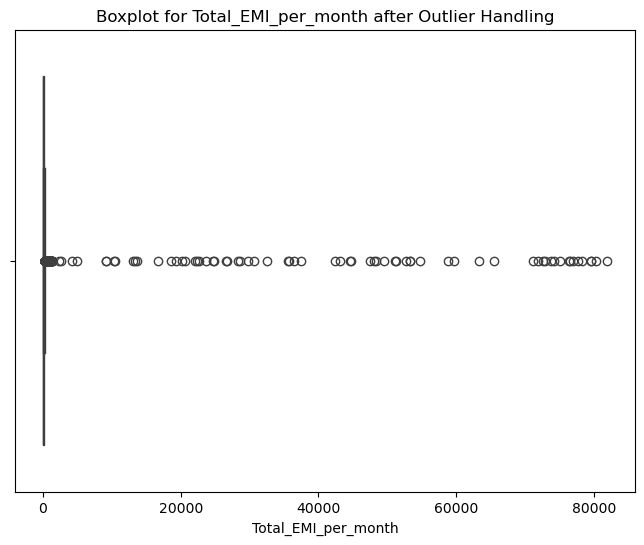

In [139]:
# 6) Total_EMI_per_month

# Step 1: Calculate the IQR and whiskers for 'Total_EMI_per_month' to identify outliers
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Total_EMI_per_month': {lower_bound}")
print(f"Upper bound for outliers in 'Total_EMI_per_month': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Total_EMI_per_month'] < lower_bound) | (df['Total_EMI_per_month'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Total_EMI_per_month'] < 0) | (df['Total_EMI_per_month'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Total_EMI_per_month': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Total_EMI_per_month': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Total_EMI_per_month'] >= 0) & (df['Total_EMI_per_month'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Total_EMI_per_month': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Total_EMI_per_month': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Total_EMI_per_month' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Total_EMI_per_month' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Total_EMI_per_month'] >= 0) & (df['Total_EMI_per_month'] <= upper_bound)]['Total_EMI_per_month']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Total_EMI_per_month'] < 0) | (df['Total_EMI_per_month'] > upper_bound)), 'Total_EMI_per_month'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Total_EMI_per_month'
remaining_outlier_values = df[(df['Total_EMI_per_month'] < 0) | (df['Total_EMI_per_month'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Total_EMI_per_month' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Total_EMI_per_month' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total_EMI_per_month'])
plt.title('Boxplot for Total_EMI_per_month after Outlier Handling')
plt.xlabel('Total_EMI_per_month')
plt.show()

In [141]:
# Step 2: Calculate the mean of all valid 'Total_EMI_per_month' rows (below the upper whisker)
valid_rows = df[df['Total_EMI_per_month'] <= upper_bound]
mean_valid_total_emi = valid_rows['Total_EMI_per_month'].mean()

print(f"Mean of valid 'Total_EMI_per_month' values: {mean_valid_total_emi}\n")

# Step 3: Replace 'Total_EMI_per_month' values above the upper whisker with this mean value
df.loc[df['Total_EMI_per_month'] > upper_bound, 'Total_EMI_per_month'] = mean_valid_total_emi

# Step 4: Check if any values above the upper whisker remain in 'Total_EMI_per_month'
remaining_outliers = df[df['Total_EMI_per_month'] > upper_bound]
print(f"Remaining outliers in 'Total_EMI_per_month' after replacement: {len(remaining_outliers)}\n")

Mean of valid 'Total_EMI_per_month' values: 90.36657249723532

Remaining outliers in 'Total_EMI_per_month' after replacement: 0



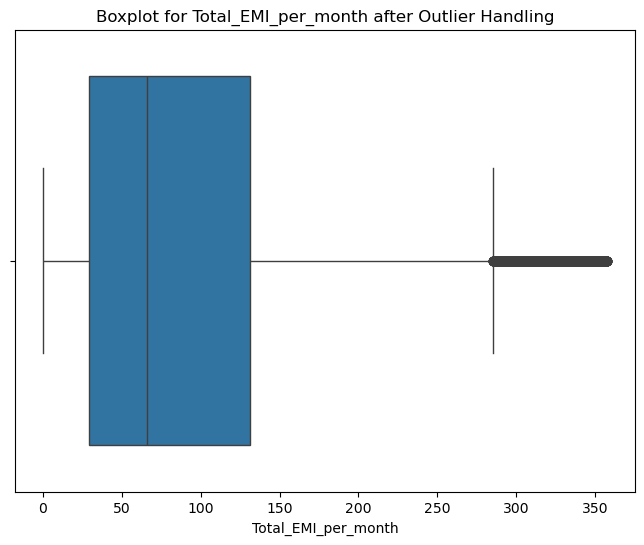

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total_EMI_per_month'])
plt.title('Boxplot for Total_EMI_per_month after Outlier Handling')
plt.xlabel('Total_EMI_per_month')
plt.show()

Lower bound for outliers in 'Amount_invested_monthly': -221.86431200988122
Upper bound for outliers in 'Amount_invested_monthly': 572.5925584705583

Count of rows with negative or outlier values in 'Amount_invested_monthly': 10936
Unique Customer_IDs with negative or outlier values in 'Amount_invested_monthly': 5768

Count of rows with valid 'Amount_invested_monthly': 89064
Unique Customer_IDs without negative or outlier values in 'Amount_invested_monthly': 12500

Count of Customer_IDs present in both sets: 5768
Count of remaining negative or outlier values in 'Amount_invested_monthly' after filling: 0



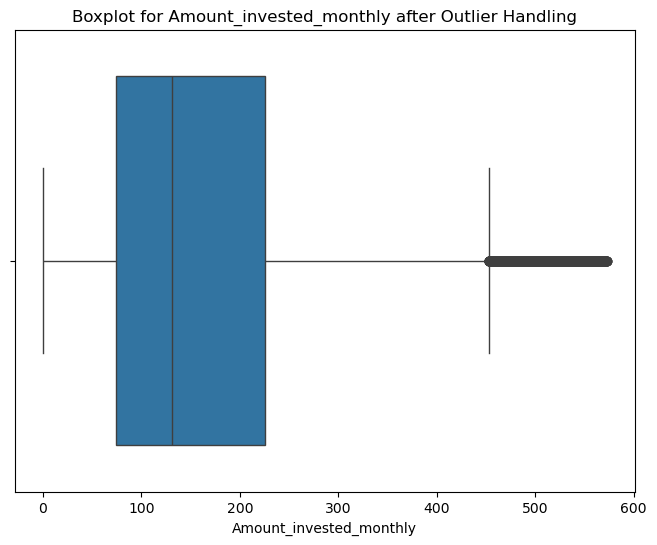

In [145]:
# 7) Amount_invested_monthly

# Step 1: Calculate the IQR and whiskers for 'Amount_invested_monthly' to identify outliers
Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Amount_invested_monthly': {lower_bound}")
print(f"Upper bound for outliers in 'Amount_invested_monthly': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Amount_invested_monthly'] < lower_bound) | (df['Amount_invested_monthly'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Amount_invested_monthly'] < 0) | (df['Amount_invested_monthly'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Amount_invested_monthly': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Amount_invested_monthly': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Amount_invested_monthly'] >= 0) & (df['Amount_invested_monthly'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Amount_invested_monthly': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Amount_invested_monthly': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Amount_invested_monthly' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Amount_invested_monthly' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Amount_invested_monthly'] >= 0) & (df['Amount_invested_monthly'] <= upper_bound)]['Amount_invested_monthly']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Amount_invested_monthly'] < 0) | (df['Amount_invested_monthly'] > upper_bound)), 'Amount_invested_monthly'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Amount_invested_monthly'
remaining_outlier_values = df[(df['Amount_invested_monthly'] < 0) | (df['Amount_invested_monthly'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Amount_invested_monthly' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Amount_invested_monthly' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount_invested_monthly'])
plt.title('Boxplot for Amount_invested_monthly after Outlier Handling')
plt.xlabel('Amount_invested_monthly')
plt.show()

Lower bound for outliers in 'Age': -3.0
Upper bound for outliers in 'Age': 69.0

Count of rows with negative or outlier values in 'Age': 2781
Unique Customer_IDs with negative or outlier values in 'Age': 2530

Count of rows with valid 'Age': 97219
Unique Customer_IDs without negative or outlier values in 'Age': 12500

Count of Customer_IDs present in both sets: 2530
Count of remaining negative or outlier values in 'Age' after filling: 0



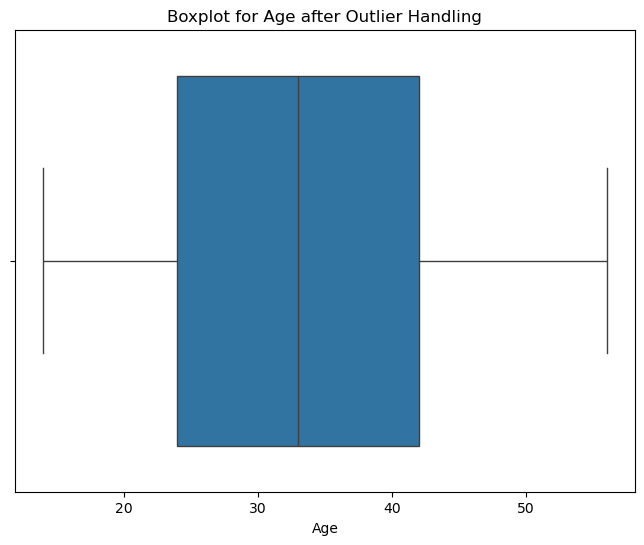

In [147]:
# 8) Age

# Step 1: Calculate the IQR and whiskers for 'Age' to identify outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Age': {lower_bound}")
print(f"Upper bound for outliers in 'Age': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Age'] < 0) | (df['Age'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Age': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Age': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Age'] >= 0) & (df['Age'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Age': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Age': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Age' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Age' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Age'] >= 0) & (df['Age'] <= upper_bound)]['Age']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Convert the mean value to an integer before replacing
        mean_value_int = int(mean_value)
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Age'] < 0) | (df['Age'] > upper_bound)), 'Age'] = mean_value_int

# Step 6: Check if any negative or outlier values remain in 'Age'
remaining_outlier_values = df[(df['Age'] < 0) | (df['Age'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Age' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Age' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age after Outlier Handling')
plt.xlabel('Age')
plt.show()

Lower bound for outliers in 'Num_of_Loan': -5.0
Upper bound for outliers in 'Num_of_Loan': 11.0

Count of rows with negative or outlier values in 'Num_of_Loan': 4348
Unique Customer_IDs with negative or outlier values in 'Num_of_Loan': 3743

Count of rows with valid 'Num_of_Loan': 95652
Unique Customer_IDs without negative or outlier values in 'Num_of_Loan': 12500

Count of Customer_IDs present in both sets: 3743
Count of remaining negative or outlier values in 'Num_of_Loan' after filling: 0



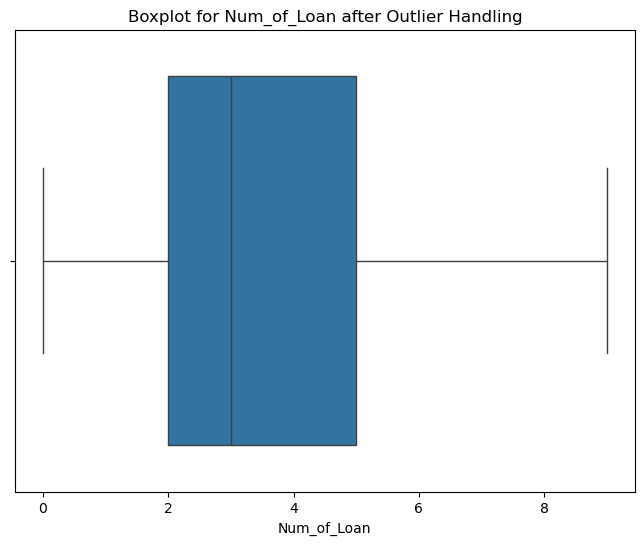

In [149]:
# 9) Num_of_Loan

# Step 1: Calculate the IQR and whiskers for 'Num_of_Loan' to identify outliers
Q1 = df['Num_of_Loan'].quantile(0.25)
Q3 = df['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Num_of_Loan': {lower_bound}")
print(f"Upper bound for outliers in 'Num_of_Loan': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Num_of_Loan'] < lower_bound) | (df['Num_of_Loan'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Num_of_Loan': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Num_of_Loan': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Num_of_Loan': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Num_of_Loan': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Num_of_Loan' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Num_of_Loan' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= upper_bound)]['Num_of_Loan']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > upper_bound)), 'Num_of_Loan'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Num_of_Loan'
remaining_outlier_values = df[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Num_of_Loan' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Num_of_Loan' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_of_Loan'])
plt.title('Boxplot for Num_of_Loan after Outlier Handling')
plt.xlabel('Num_of_Loan')
plt.show()

Lower bound for outliers in 'Monthly_Balance': -31.95246295068341
Upper bound for outliers in 'Monthly_Balance': 773.664123241673

Count of rows with negative or outlier values in 'Monthly_Balance': 7636
Unique Customer_IDs with negative or outlier values in 'Monthly_Balance': 1949

Count of rows with valid 'Monthly_Balance': 92364
Unique Customer_IDs without negative or outlier values in 'Monthly_Balance': 12448

Count of Customer_IDs present in both sets: 1897
Count of remaining negative or outlier values in 'Monthly_Balance' after filling: 416



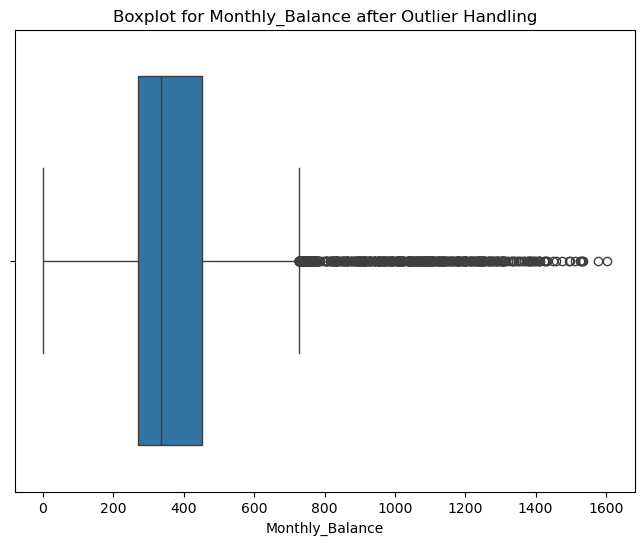

In [151]:
# 10) Monthly_Balance

# Step 1: Calculate the IQR and whiskers for 'Monthly_Balance' to identify outliers
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Monthly_Balance': {lower_bound}")
print(f"Upper bound for outliers in 'Monthly_Balance': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Monthly_Balance'] < lower_bound) | (df['Monthly_Balance'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Monthly_Balance'] < 0) | (df['Monthly_Balance'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Monthly_Balance': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Monthly_Balance': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Monthly_Balance'] >= 0) & (df['Monthly_Balance'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Monthly_Balance': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Monthly_Balance': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Monthly_Balance' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Monthly_Balance' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Monthly_Balance'] >= 0) & (df['Monthly_Balance'] <= upper_bound)]['Monthly_Balance']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Monthly_Balance'] < 0) | (df['Monthly_Balance'] > upper_bound)), 'Monthly_Balance'] = mean_value

# Step 6: Check if any negative or outlier values remain in 'Monthly_Balance'
remaining_outlier_values = df[(df['Monthly_Balance'] < 0) | (df['Monthly_Balance'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Monthly_Balance' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Monthly_Balance' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Monthly_Balance'])
plt.title('Boxplot for Monthly_Balance after Outlier Handling')
plt.xlabel('Monthly_Balance')
plt.show()

In [153]:
# Step 2: Calculate the mean of all valid 'Monthly_Balance' rows (below the upper whisker)
valid_rows = df[df['Monthly_Balance'] <= upper_bound]
mean_valid_monthly_balance = valid_rows['Monthly_Balance'].mean()

print(f"Mean of valid 'Monthly_Balance' values: {mean_valid_monthly_balance}\n")

# Step 3: Replace 'Monthly_Balance' values above the upper whisker with this mean value
df.loc[df['Monthly_Balance'] > upper_bound, 'Monthly_Balance'] = mean_valid_monthly_balance

# Step 4: Check if any values above the upper whisker remain in 'Monthly_Balance'
remaining_outliers = df[df['Monthly_Balance'] > upper_bound]
print(f"Remaining outliers in 'Monthly_Balance' after replacement: {len(remaining_outliers)}\n")

Mean of valid 'Monthly_Balance' values: 368.1088560374398

Remaining outliers in 'Monthly_Balance' after replacement: 0



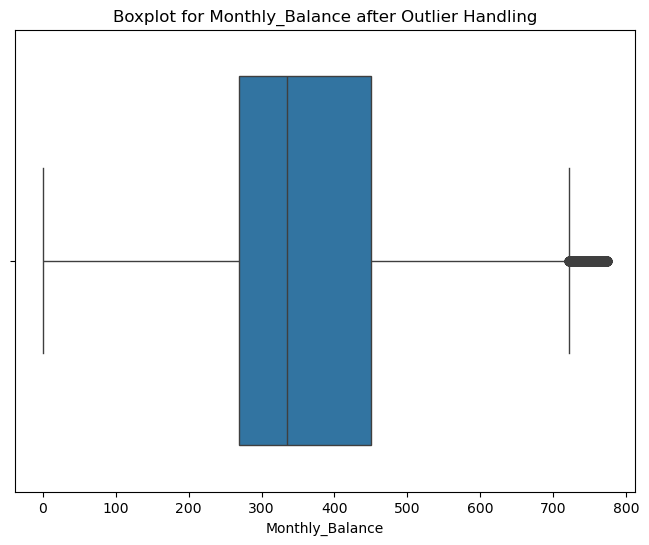

In [155]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Monthly_Balance'])
plt.title('Boxplot for Monthly_Balance after Outlier Handling')
plt.xlabel('Monthly_Balance')
plt.show()

Lower bound for outliers in 'Annual_Income': -60542.630000000005
Upper bound for outliers in 'Annual_Income': 152791.05

Count of rows with negative or outlier values in 'Annual_Income': 2783
Unique Customer_IDs with negative or outlier values in 'Annual_Income': 1174

Count of rows with valid 'Annual_Income': 97217
Unique Customer_IDs without negative or outlier values in 'Annual_Income': 12275

Count of Customer_IDs present in both sets: 949
Count of remaining negative or outlier values in 'Annual_Income' after filling: 1800



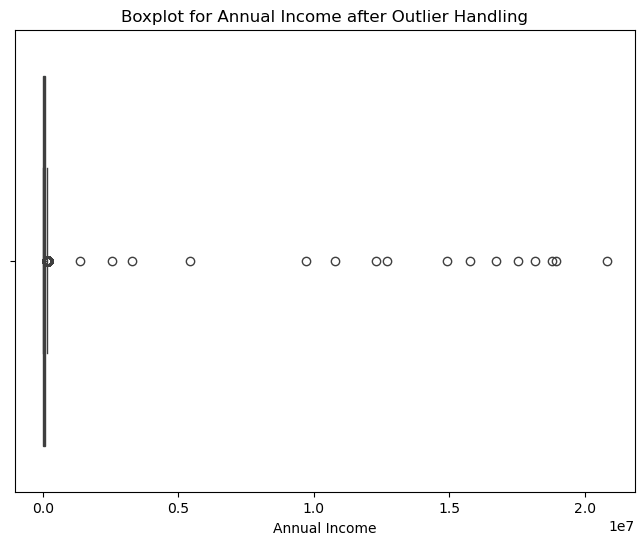

In [157]:
# 11) Annual_income

# Step 1: Calculate the IQR and whiskers for 'Annual_Income' to identify outliers
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers based on 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers in 'Annual_Income': {lower_bound}")
print(f"Upper bound for outliers in 'Annual_Income': {upper_bound}\n")

# Step 2: Identify rows with negative values and those outside the whiskers (outliers)
outlier_rows = df[(df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound)]
rows_with_negatives_or_outliers = df[(df['Annual_Income'] < 0) | (df['Annual_Income'] > upper_bound)]
outlier_customer_ids = rows_with_negatives_or_outliers['Customer_ID'].unique()

print(f"Count of rows with negative or outlier values in 'Annual_Income': {len(rows_with_negatives_or_outliers)}")
print(f"Unique Customer_IDs with negative or outlier values in 'Annual_Income': {len(outlier_customer_ids)}\n")

# Step 3: Identify rows without negative values or outliers
valid_value_rows = df[(df['Annual_Income'] >= 0) & (df['Annual_Income'] <= upper_bound)]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Annual_Income': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative or outlier values in 'Annual_Income': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(outlier_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative and outlier values in 'Annual_Income' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Annual_Income' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Annual_Income'] >= 0) & (df['Annual_Income'] <= upper_bound)]['Annual_Income']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Convert the mean value to an integer before replacing
        mean_value_int = int(mean_value)
        # Replace the negative and outlier entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & ((df['Annual_Income'] < 0) | (df['Annual_Income'] > upper_bound)), 'Annual_Income'] = mean_value_int

# Step 6: Check if any negative or outlier values remain in 'Annual_Income'
remaining_outlier_values = df[(df['Annual_Income'] < 0) | (df['Annual_Income'] > upper_bound)]
print(f"Count of remaining negative or outlier values in 'Annual_Income' after filling: {len(remaining_outlier_values)}\n")

# Optional: Boxplot visualization for 'Annual_Income' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual_Income'])
plt.title('Boxplot for Annual Income after Outlier Handling')
plt.xlabel('Annual Income')
plt.show()

In [159]:
# Step 2: Calculate the mean of all valid 'Annual_Income' rows (below the upper whisker)
valid_rows = df[df['Annual_Income'] <= upper_bound]
mean_valid_annual_income = valid_rows['Annual_Income'].mean()

print(f"Mean of valid 'Annual_Income' values: {mean_valid_annual_income}\n")

# Step 3: Replace 'Annual_Income' values above the upper whisker with this mean value
df.loc[df['Annual_Income'] > upper_bound, 'Annual_Income'] = mean_valid_annual_income

# Step 4: Check if any values above the upper whisker remain in 'Annual_Income'
remaining_outliers = df[df['Annual_Income'] > upper_bound]
print(f"Remaining outliers in 'Annual_Income' after replacement: {len(remaining_outliers)}\n")

Mean of valid 'Annual_Income' values: 48356.45959933809

Remaining outliers in 'Annual_Income' after replacement: 0



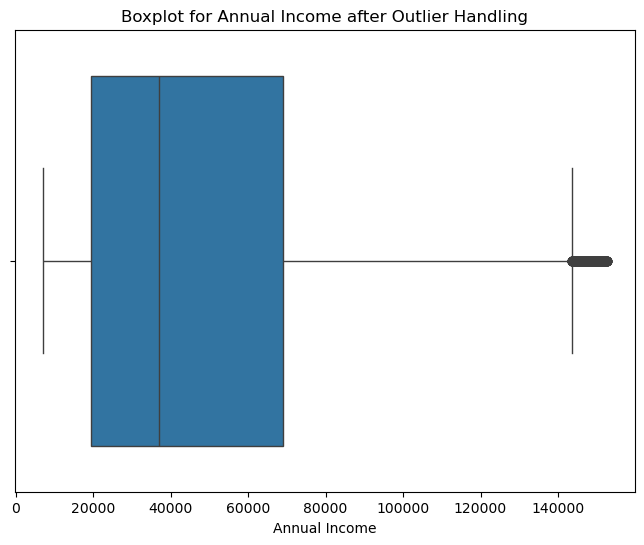

In [161]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual_Income'])
plt.title('Boxplot for Annual Income after Outlier Handling')
plt.xlabel('Annual Income')
plt.show()

Upper bound for outliers in 'Delay_from_due_date': 55.0

Count of rows with negative values in 'Delay_from_due_date': 591
Unique Customer_IDs with negative values in 'Delay_from_due_date': 432

Count of rows with valid 'Delay_from_due_date': 99409
Unique Customer_IDs without negative values in 'Delay_from_due_date': 12500

Count of Customer_IDs present in both sets: 432


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/4072739204.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8333333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Customer_ID'] == customer_id) & (df['Delay_from_due_date'] < 0), 'Delay_from_due_date'] = mean_value


Count of remaining negative values in 'Delay_from_due_date' after filling: 0



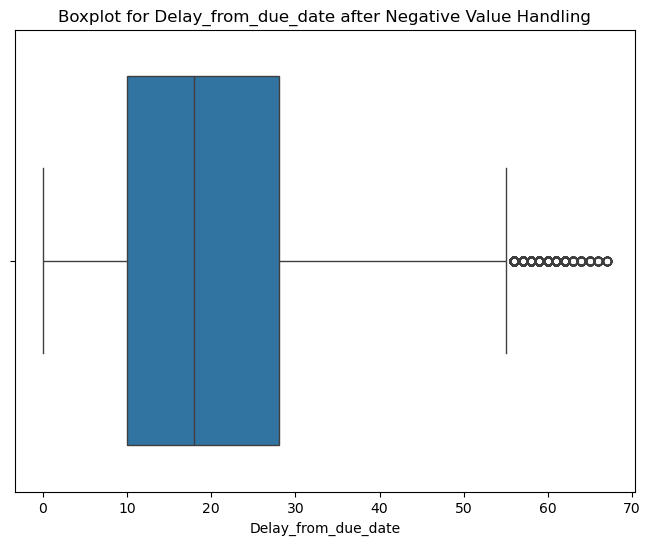

In [165]:
# 12) Delay_from_due_date

# Step 1: Calculate the IQR and whiskers for 'Delay_from_due_date' to identify outliers
Q1 = df['Delay_from_due_date'].quantile(0.25)
Q3 = df['Delay_from_due_date'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper bound for outliers based on 1.5*IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers in 'Delay_from_due_date': {upper_bound}\n")

# Step 2: Identify rows with negative values in 'Delay_from_due_date'
negative_rows = df[df['Delay_from_due_date'] < 0]
negative_customer_ids = negative_rows['Customer_ID'].unique()

print(f"Count of rows with negative values in 'Delay_from_due_date': {len(negative_rows)}")
print(f"Unique Customer_IDs with negative values in 'Delay_from_due_date': {len(negative_customer_ids)}\n")

# Step 3: Identify rows without negative values
valid_value_rows = df[df['Delay_from_due_date'] >= 0]
valid_customer_ids = valid_value_rows['Customer_ID'].unique()

print(f"Count of rows with valid 'Delay_from_due_date': {len(valid_value_rows)}")
print(f"Unique Customer_IDs without negative values in 'Delay_from_due_date': {len(valid_customer_ids)}\n")

# Step 4: Find intersection of Customer_IDs present in both sets
common_customer_ids = np.intersect1d(negative_customer_ids, valid_customer_ids)
print(f"Count of Customer_IDs present in both sets: {len(common_customer_ids)}")

# Step 5: Replace negative values in 'Delay_from_due_date' with the mean of valid rows for the same customer ID
for customer_id in common_customer_ids:
    # Get the valid 'Delay_from_due_date' values for this customer
    valid_values = df[(df['Customer_ID'] == customer_id) & (df['Delay_from_due_date'] >= 0)]['Delay_from_due_date']
    if not valid_values.empty:
        mean_value = valid_values.mean()
        # Replace the negative entries with the mean value for this customer
        df.loc[(df['Customer_ID'] == customer_id) & (df['Delay_from_due_date'] < 0), 'Delay_from_due_date'] = mean_value

# Step 6: Check if any negative values remain in 'Delay_from_due_date'
remaining_negative_values = df[df['Delay_from_due_date'] < 0]
print(f"Count of remaining negative values in 'Delay_from_due_date' after filling: {len(remaining_negative_values)}\n")

# Optional: Boxplot visualization for 'Delay_from_due_date' after handling negative values
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Delay_from_due_date'])
plt.title('Boxplot for Delay_from_due_date after Negative Value Handling')
plt.xlabel('Delay_from_due_date')
plt.show()

In [167]:
# List to hold the results
negative_counts = {}

# Iterate through numeric columns and count negative values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    negative_count = (df[column] < 0).sum()
    negative_counts[column] = negative_count

# Print the counts of negative values alongside column names
for column, count in negative_counts.items():
    print(f"Count of negative values in '{column}': {count}")

Count of negative values in 'Age': 0
Count of negative values in 'Annual_Income': 0
Count of negative values in 'Num_Bank_Accounts': 0
Count of negative values in 'Num_Credit_Card': 0
Count of negative values in 'Interest_Rate': 0
Count of negative values in 'Num_of_Loan': 0
Count of negative values in 'Delay_from_due_date': 0
Count of negative values in 'Num_of_Delayed_Payment': 0
Count of negative values in 'Changed_Credit_Limit': 1599
Count of negative values in 'Num_Credit_Inquiries': 0
Count of negative values in 'Outstanding_Debt': 0
Count of negative values in 'Credit_Utilization_Ratio': 0
Count of negative values in 'Credit_History_Age': 0
Count of negative values in 'Total_EMI_per_month': 0
Count of negative values in 'Amount_invested_monthly': 0
Count of negative values in 'Monthly_Balance': 0
Count of negative values in 'Unemployment_Rate': 0


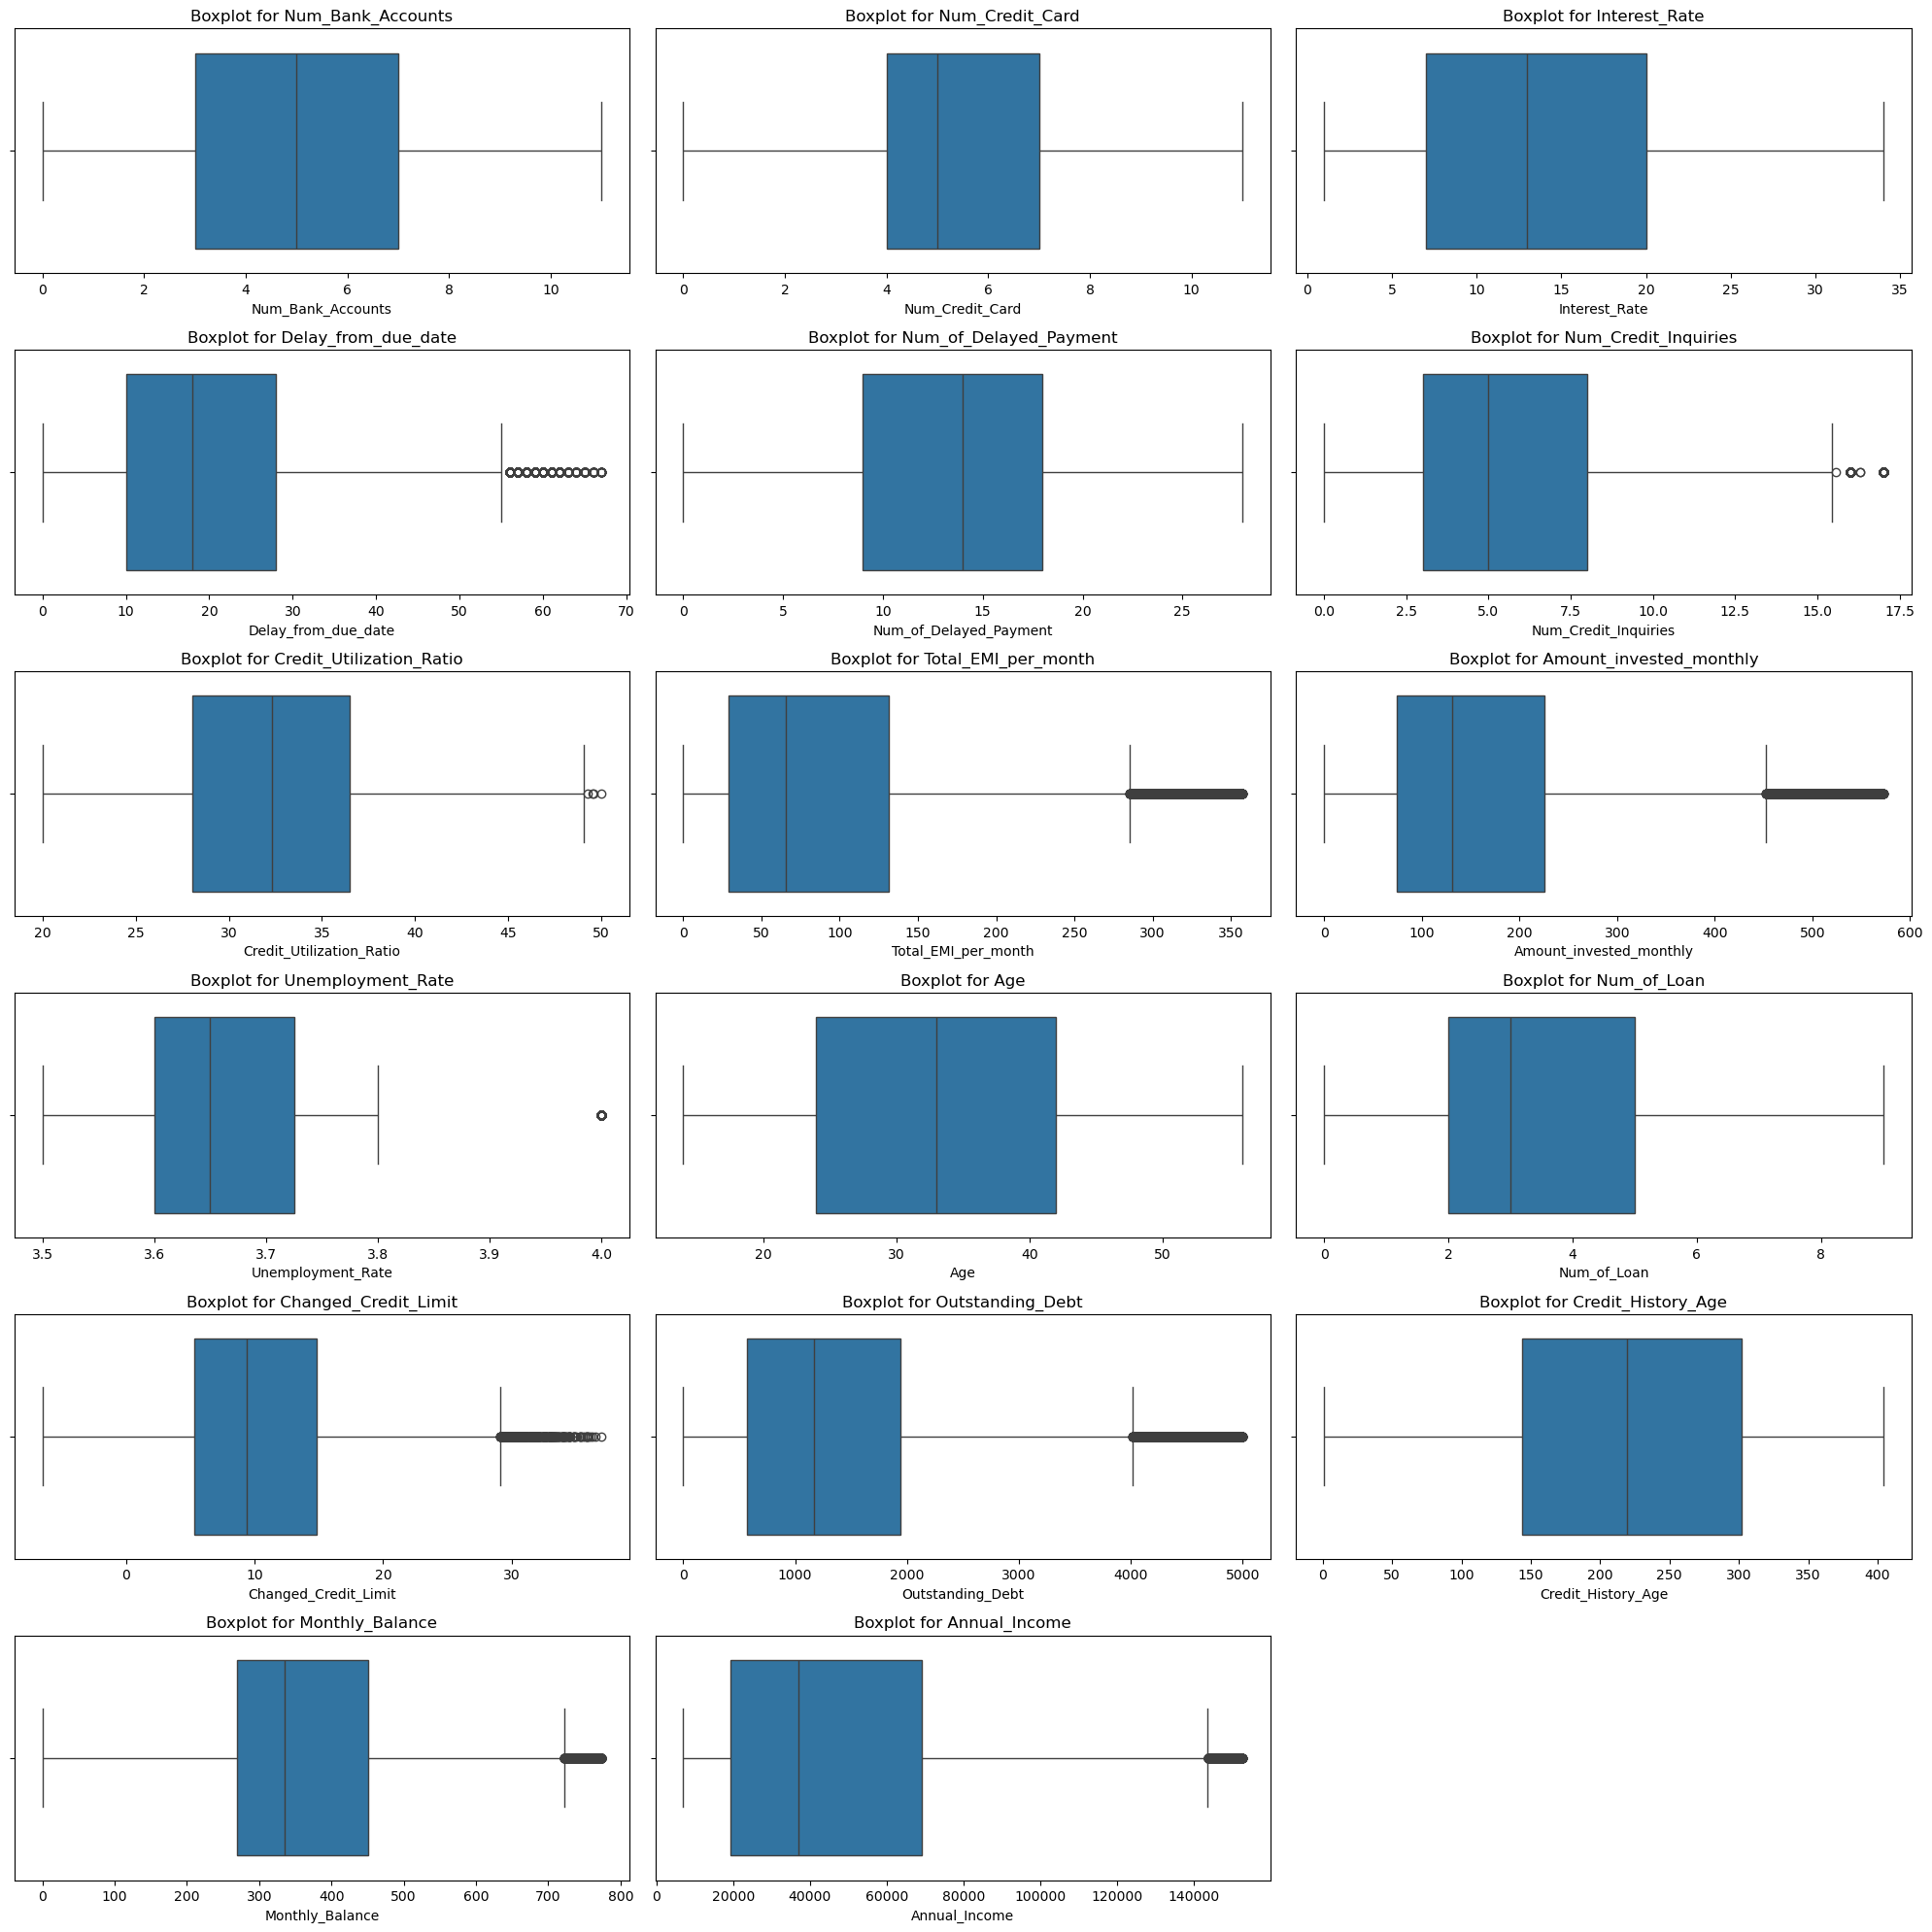

In [169]:
# List of columns to plot, including the specified columns
columns_to_plot = [
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Num_of_Delayed_Payment', 
    'Num_Credit_Inquiries', 
    'Credit_Utilization_Ratio', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly', 
    'Unemployment_Rate',
    'Age',
    'Num_of_Loan',           
    'Changed_Credit_Limit',    
    'Outstanding_Debt',         
    'Credit_History_Age',
    'Monthly_Balance', 
    'Annual_Income'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))  # Adjust size as needed

# Loop through each column and plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(6, 3, i + 1)  # 5 rows, 3 columns, i + 1 for the subplot index
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [236]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [173]:
# Assuming your preprocessed DataFrame is named 'pca_df'
df.to_csv('Train_Preprocessed.csv', index=False)  # index=False to avoid saving the index column

# Data Visualisations

## 1. Distribution of Credit Scores

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/2881802201.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Score', palette='Set2')


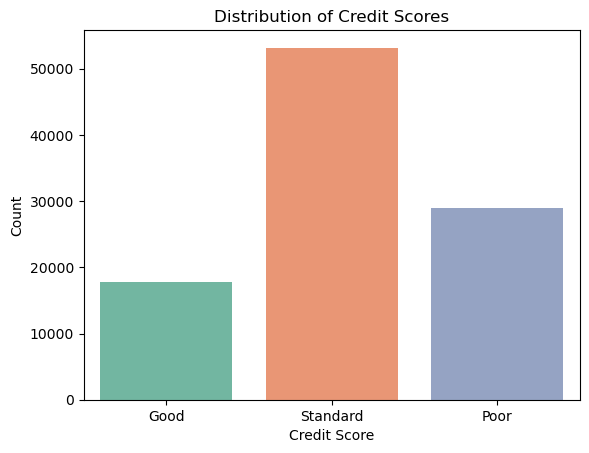

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/Train_Preprocessed.csv')

# Plot distribution of Credit_Score
sns.countplot(data=df, x='Credit_Score', palette='Set2')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

* This bar plot shows the frequency of each credit score category (Good, Standard, Poor). It helps identify the balance or imbalance in the dataset. *

## 2. Annual Income vs. Credit Score

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/1648731772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', palette='pastel')


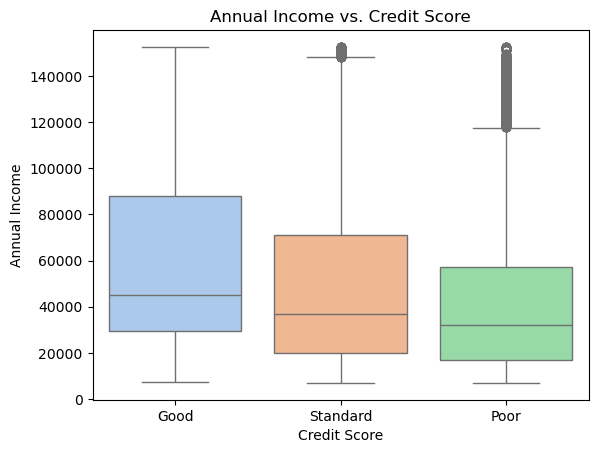

In [192]:

sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', palette='pastel')
plt.title('Annual Income vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()
 

This box plot compares the distribution of annual income across different credit score categories. It helps determine if higher income correlates with better credit scores.

## 3. Credit Utilization Ratio by Credit Score

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/1074919411.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Credit_Score', y='Credit_Utilization_Ratio', palette='coolwarm')


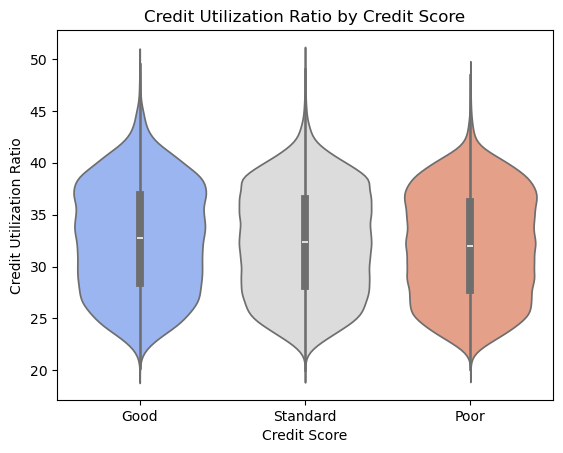

In [196]:
sns.violinplot(data=df, x='Credit_Score', y='Credit_Utilization_Ratio', palette='coolwarm')
plt.title('Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

This violin plot shows the distribution of credit utilization ratios for each credit score category. It highlights how credit utilization impacts credit scores.

## 4. Number of Delayed Payments vs. Credit Score

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/2665599370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Credit_Score', y='Num_of_Delayed_Payment', palette='viridis')


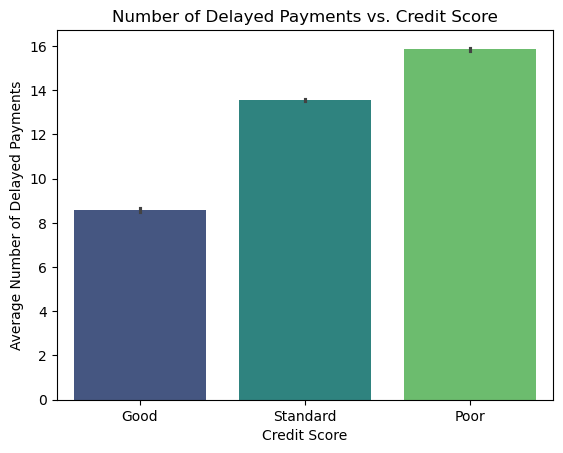

In [200]:
sns.barplot(data=df, x='Credit_Score', y='Num_of_Delayed_Payment', palette='viridis')
plt.title('Number of Delayed Payments vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Delayed Payments')
plt.show()

This bar plot displays the average number of delayed payments for each credit score category. It shows how delayed payments negatively affect credit scores.

## 5. Outstanding Debt by Credit Score

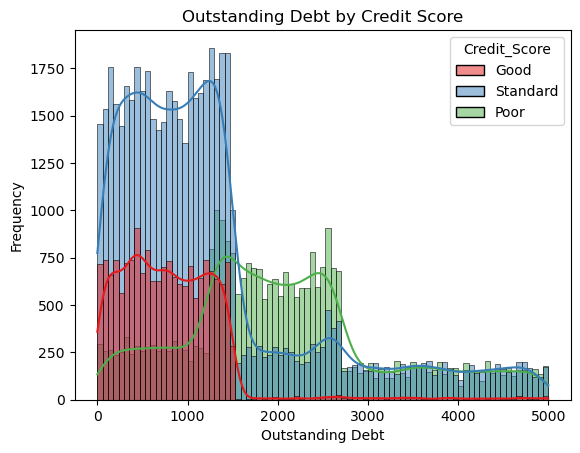

In [204]:
sns.histplot(data=df, x='Outstanding_Debt', hue='Credit_Score', kde=True, palette='Set1')
plt.title('Outstanding Debt by Credit Score')
plt.xlabel('Outstanding Debt')
plt.ylabel('Frequency')
plt.show()

This histogram with KDE (Kernel Density Estimate) shows the distribution of outstanding debt for each credit score category. It helps identify trends in debt levels.


## 6. Correlation Heatmap

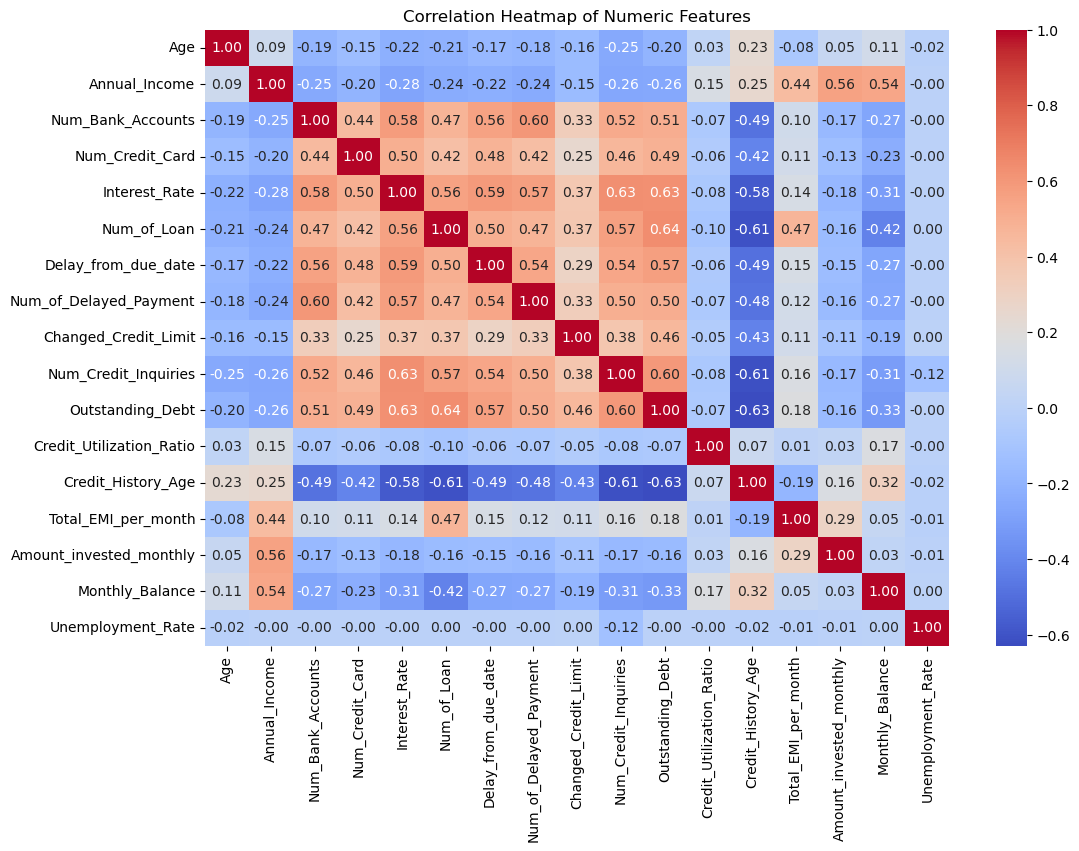

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Month' to datetime (if not already done)
df['Month'] = pd.to_datetime(df['Month'])

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

This heatmap visualizes the correlation between numerical features in the dataset. It helps identify relationships between variables like income, debt, and credit utilization.


## 7. Payment Behavior by Credit Score

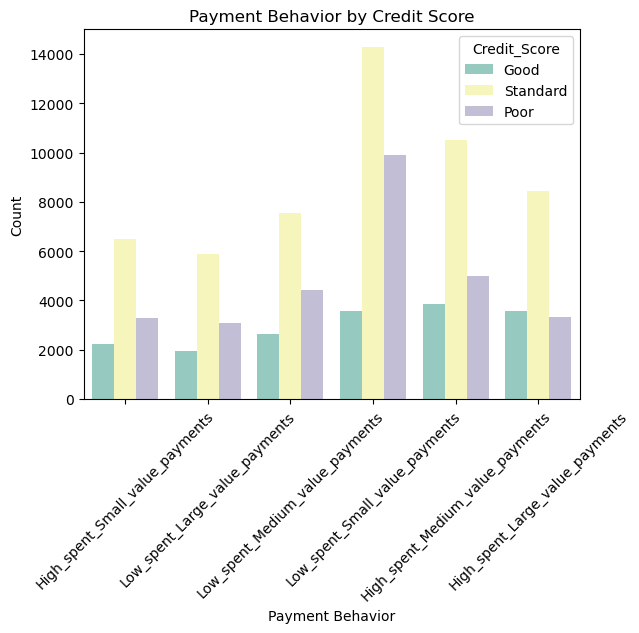

In [216]:
sns.countplot(data=df, x='Payment_Behaviour', hue='Credit_Score', palette='Set3')
plt.title('Payment Behavior by Credit Score')
plt.xlabel('Payment Behavior')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This bar plot shows the frequency of different payment behaviors (e.g., High_spent_Small_value_payments) for each credit score category. It highlights how spending habits impact credit scores.


## 8. Unemployment Rate Over Time

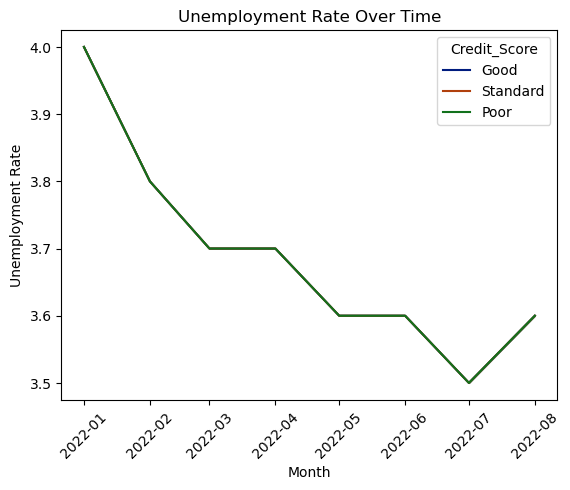

In [220]:
sns.lineplot(data=df, x='Month', y='Unemployment_Rate', hue='Credit_Score', palette='dark')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

This line plot tracks the unemployment rate over time, segmented by credit score. It explores how economic factors like unemployment influence credit scores.


## 9. Number of Bank Accounts by Credit Score

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_72872/52030612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Credit_Score', y='Num_Bank_Accounts', palette='pastel')


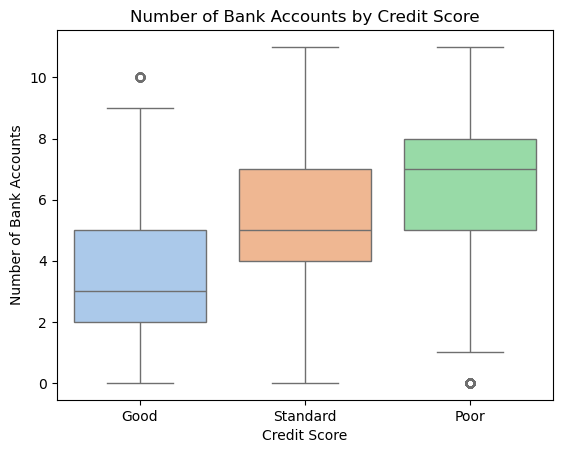

In [224]:
sns.boxplot(data=df, x='Credit_Score', y='Num_Bank_Accounts', palette='pastel')
plt.title('Number of Bank Accounts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Bank Accounts')
plt.show()

This box plot compares the number of bank accounts across credit score categories. It helps determine if having more accounts correlates with better credit scores.


## 10. Credit Mix Distribution

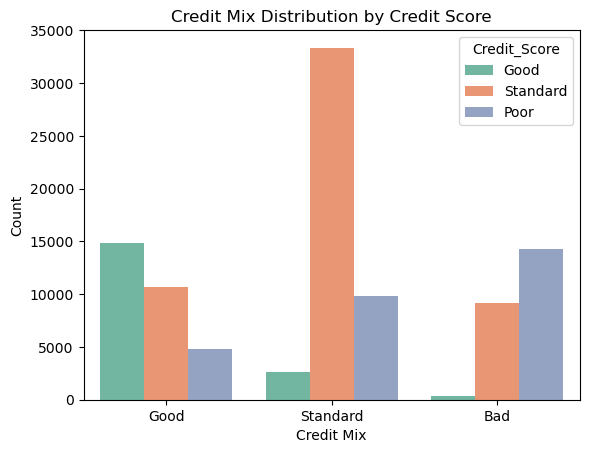

In [228]:
sns.countplot(data=df, x='Credit_Mix', hue='Credit_Score', palette='Set2')
plt.title('Credit Mix Distribution by Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.show()

This bar plot shows the distribution of credit mix (Good, Bad, Standard) for each credit score category. It highlights the importance of having a diverse credit portfolio.